# Bank Customer Churn Prediction

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from tabulate import tabulate
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\LKOUL\Desktop\JUPI\ClassificationOnCRMDataset (1)\Churn_Modelling.csv")

### Exploratory Data Analysis - EDA 

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

Το dataset μας περιέχει 10000 γραμμές (rows) και 14 μεταβλητές (Variables).
Δημιουργούμε τα metadata.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Data Cleaning ##

#### Checking Missing Values

In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Παρατηρούμε πως δεν λείπουν τιμές από το Dataframe. 

#### Checking and Updating Data Type ####

In [7]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Οι τύποι δεδομένων (Datatypes) από όλες τις στήλες (columns) είναι σωστοί.

#### Frequency Table of Each Variable

Πίνακας συχνοτήτων (Frequency Table) που χρησιμοποιείται για τον έλεγχο των τιμών κάθε στήλης

In [8]:
df.apply(lambda x: print(x.value_counts(),"\n"))

1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: RowNumber, Length: 10000, dtype: int64 

15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: CustomerId, Length: 10000, dtype: int64 

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64 

850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64 

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64 

Male      5457
Female    4543
Name: Gender, dtype: int64 

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name

RowNumber          None
CustomerId         None
Surname            None
CreditScore        None
Geography          None
Gender             None
Age                None
Tenure             None
Balance            None
NumOfProducts      None
HasCrCard          None
IsActiveMember     None
EstimatedSalary    None
Exited             None
dtype: object

## Descriptive Analysis ##

In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Ο παραπάνω πίνακας δείχνει τα συνοπτικά στατιστικά στοιχεία κάθε στήλης, όπως οι ελάχιστες και μέγιστες τιμές, η τυπική απόκλιση, το συνολικό πλήθος και τις 1ες, 2ες και 3ες ποσοστιαίες ποσότητες.

In [10]:
df.describe(include="O")

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


Δεδομένου ότι το RowNumber, customerID and Surnames είναι απλώς ids για τους πελάτες, για το λόγο αυτό δεν θα συμπεριληφθούν στην ανάλυση.

# Visualization #

### Univariane Analysis ###

Διαχωρισμός κατηγοριών κι αριθμητικών μεταβλητών.

In [11]:
sns.set(rc={'figure.figsize':(15.7,8.27)})

In [12]:
categorical = ['Gender','Geography','HasCrCard','NumOfProducts','IsActiveMember','Exited']
numerical = ['CreditScore','Tenure','Balance','EstimatedSalary','Age']

**Categorical Plot**

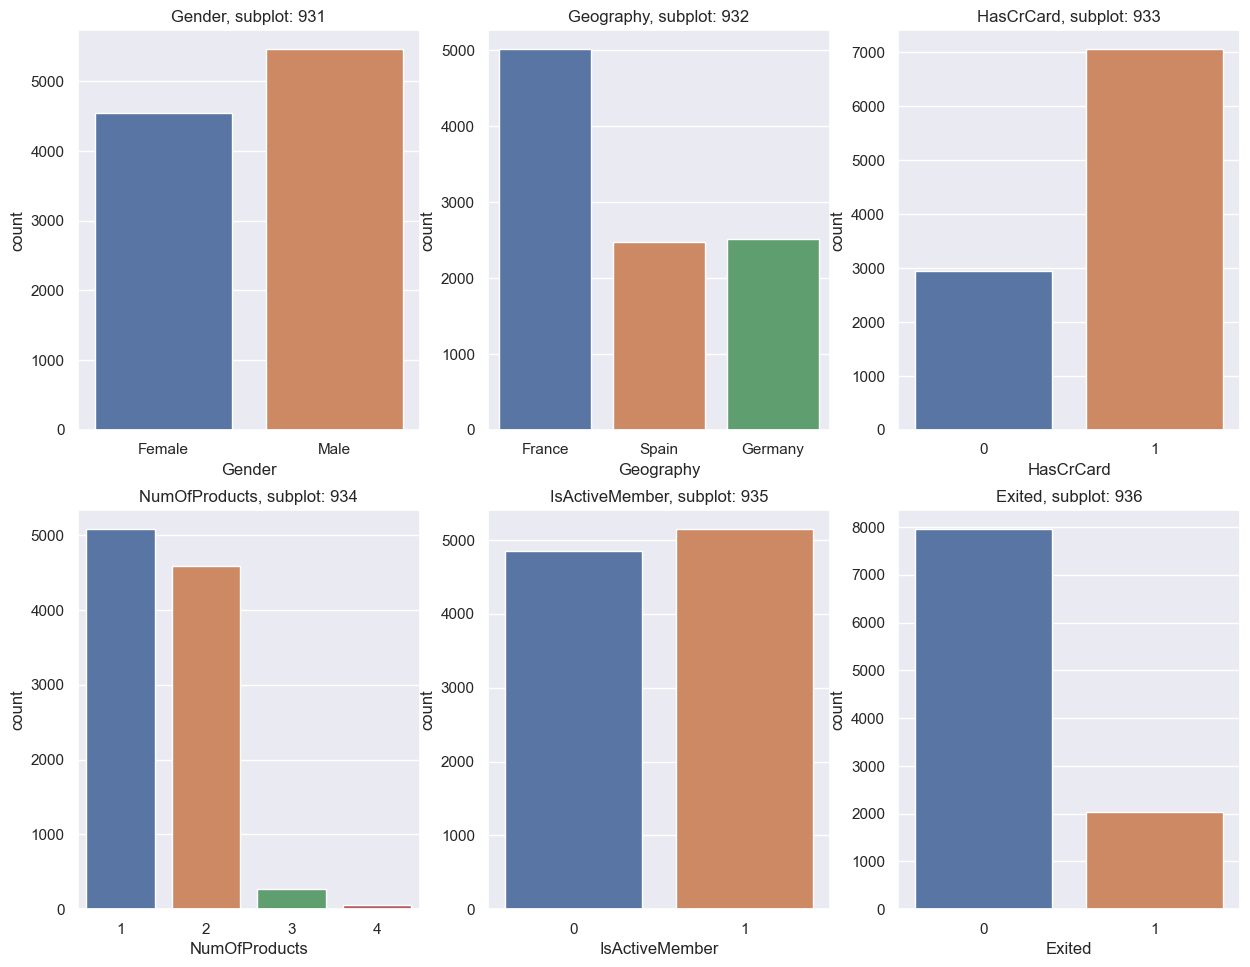

In [13]:
a=9
b=3
c=1
fig = plt.figure(figsize=(15,55))
for i in categorical:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.countplot(data = df, x=i)
    c = c + 1

Από τα παραπάνω barplots όλων των κατηγορικών μεταβλητών (categorical variables) μπορούμε να δούμε την κατανομή των τιμών σε όλες τις κατηγορικές στήλες (categorical columns). Παρατηρούμε οτι:
- Οι άντρες αποτελούν την πλειοψηφία στο dataset
- Oι περισσότεροι πελάτες είναι από την Γαλλία
- Οι περισσότεροι πελάτες έχουν πιστωτική κάρτα
- Οι περισσότεροι πελάτες έχουν 1 ή 2 προϊόντα
- Τα ενεργά μέλη (isActiveMember) είναι ελαφρώς περισσότερα από τα μη ενεργά
- Τέλος, περίπου το 20% των πελατών έχει αποχωρήσει (exited)
Οπτικοποίηση σε Pie Chart και ποσοστιαία παρουσίαση των κατανομών αυτών.

#### Pie Chart

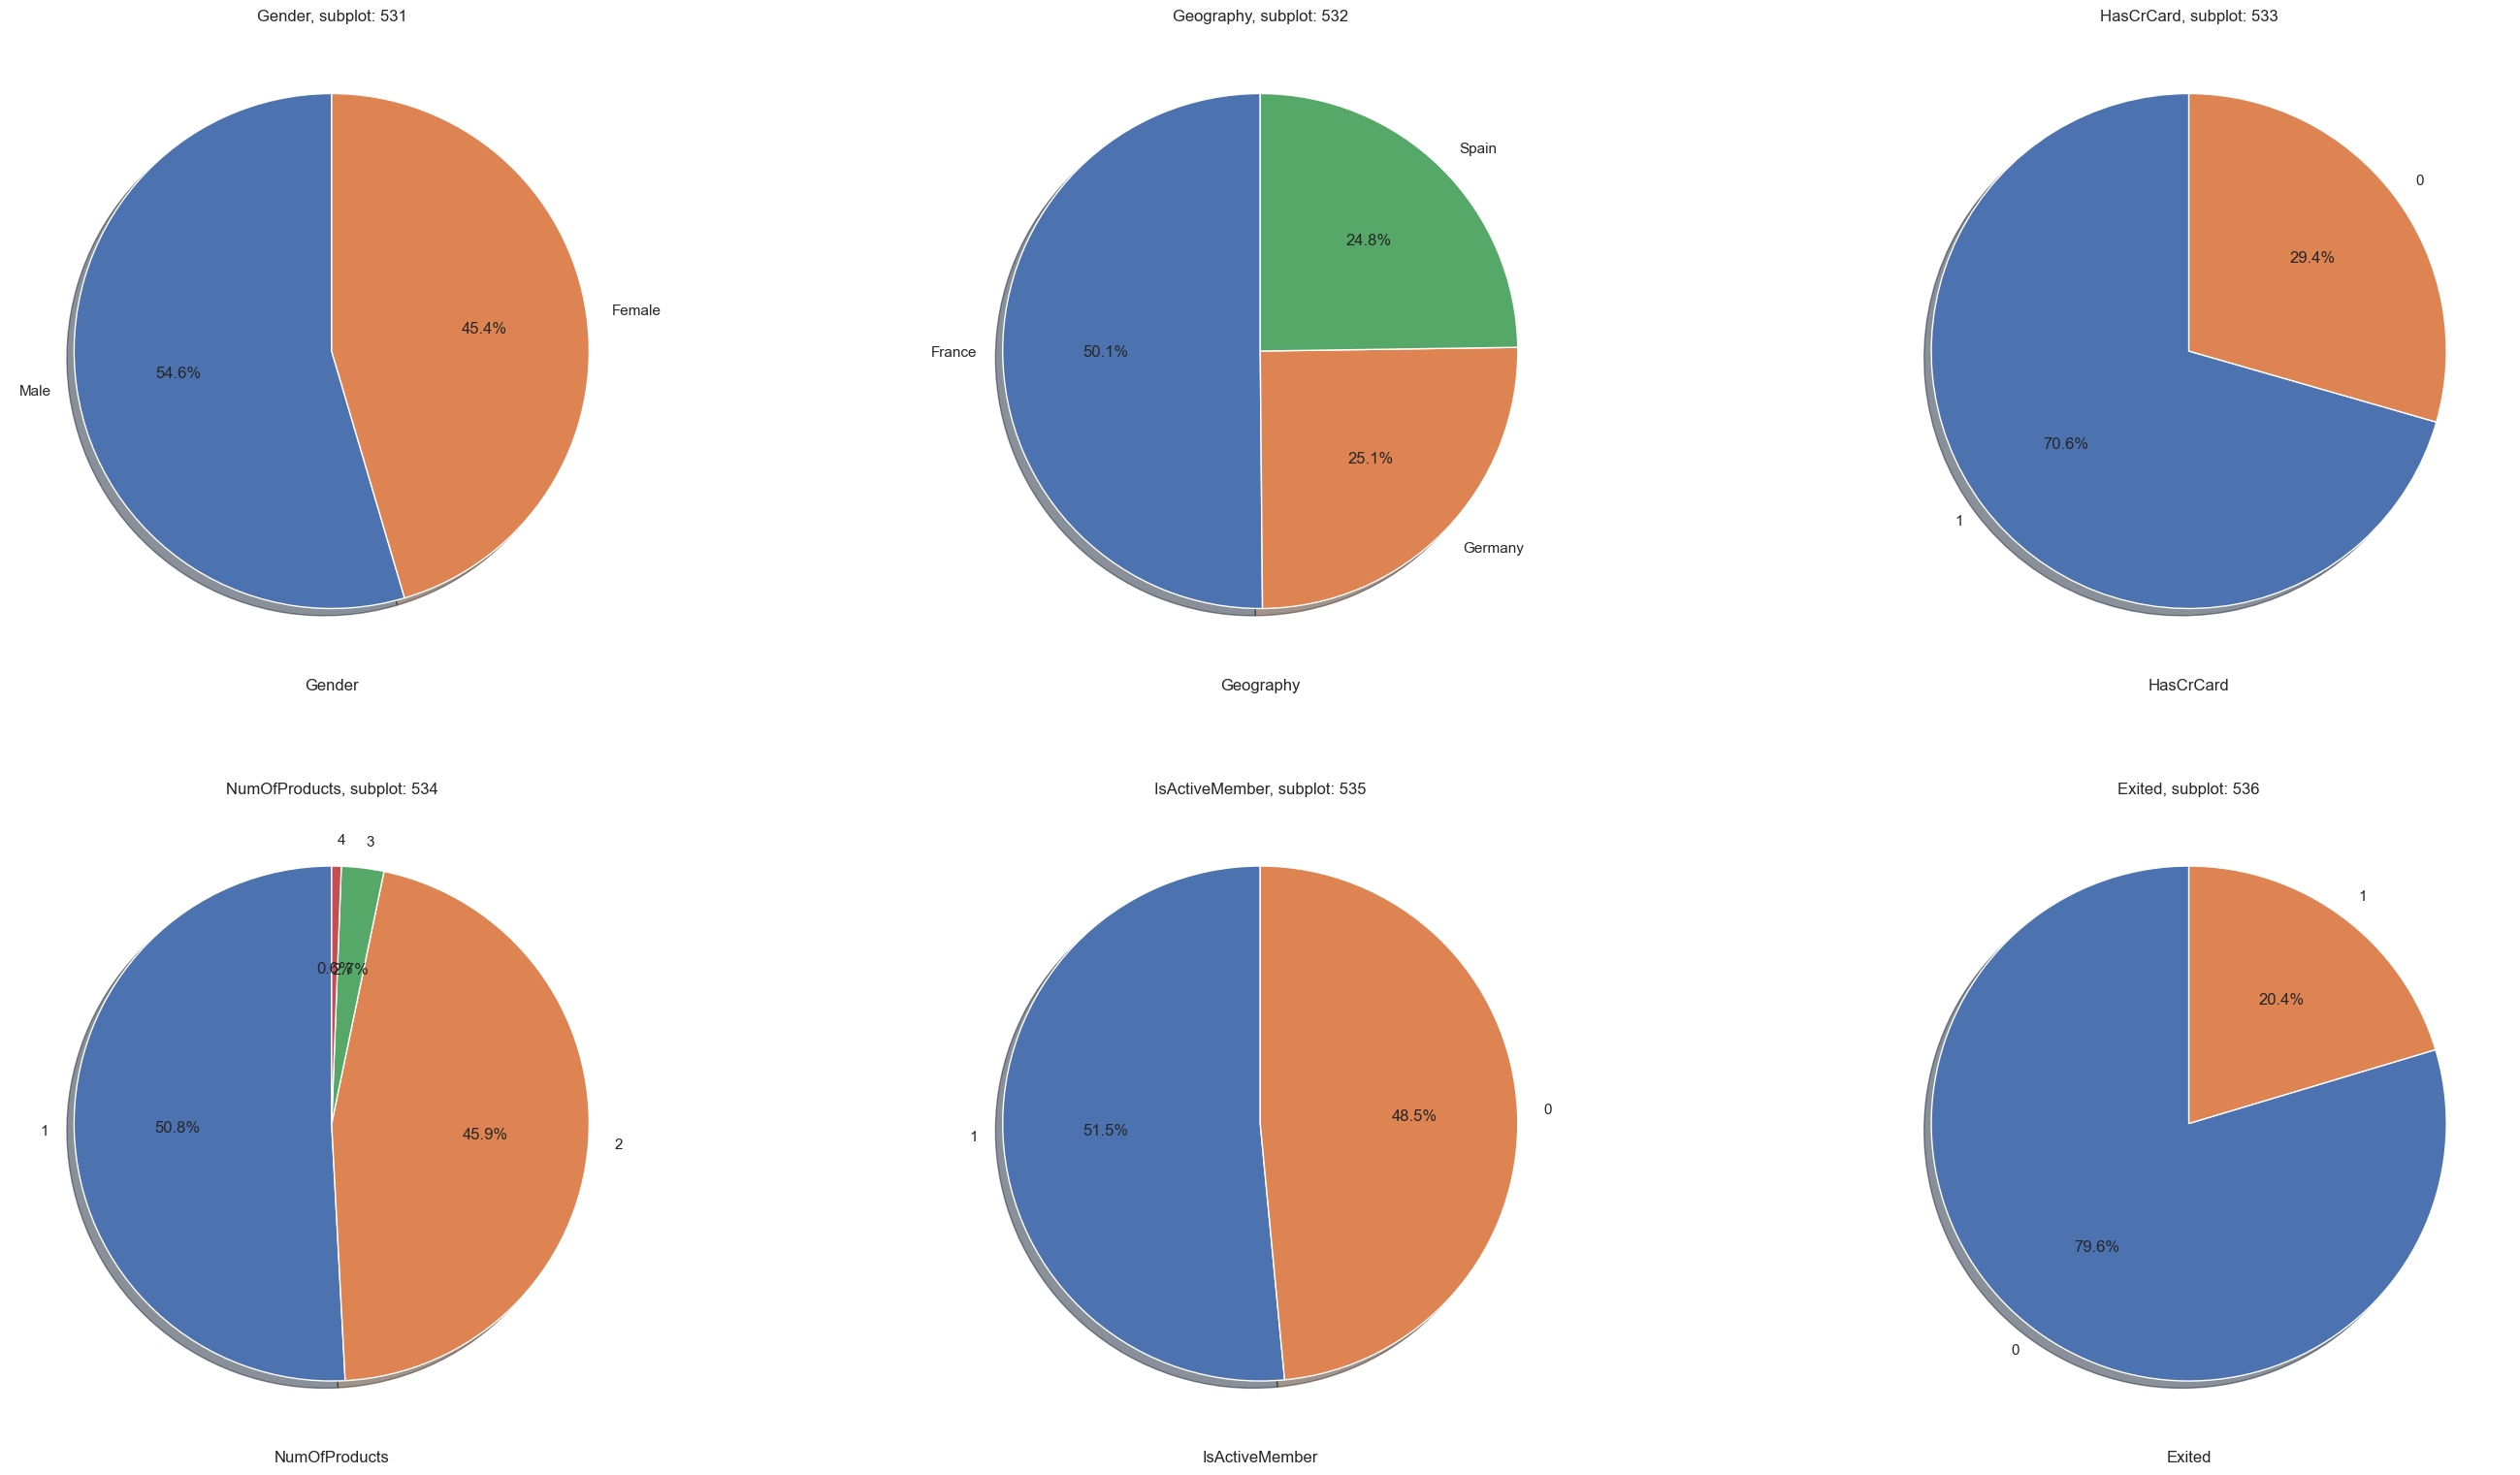

In [14]:
a=5
b=3
c=1
fig = plt.figure(figsize=(35,50))
for i in df[categorical]:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    plt.pie(df[i].value_counts(),autopct='%1.1f%%',startangle=90,shadow=True,labels=df[i].value_counts().keys().values)
    c = c + 1

**Numerical Plot**

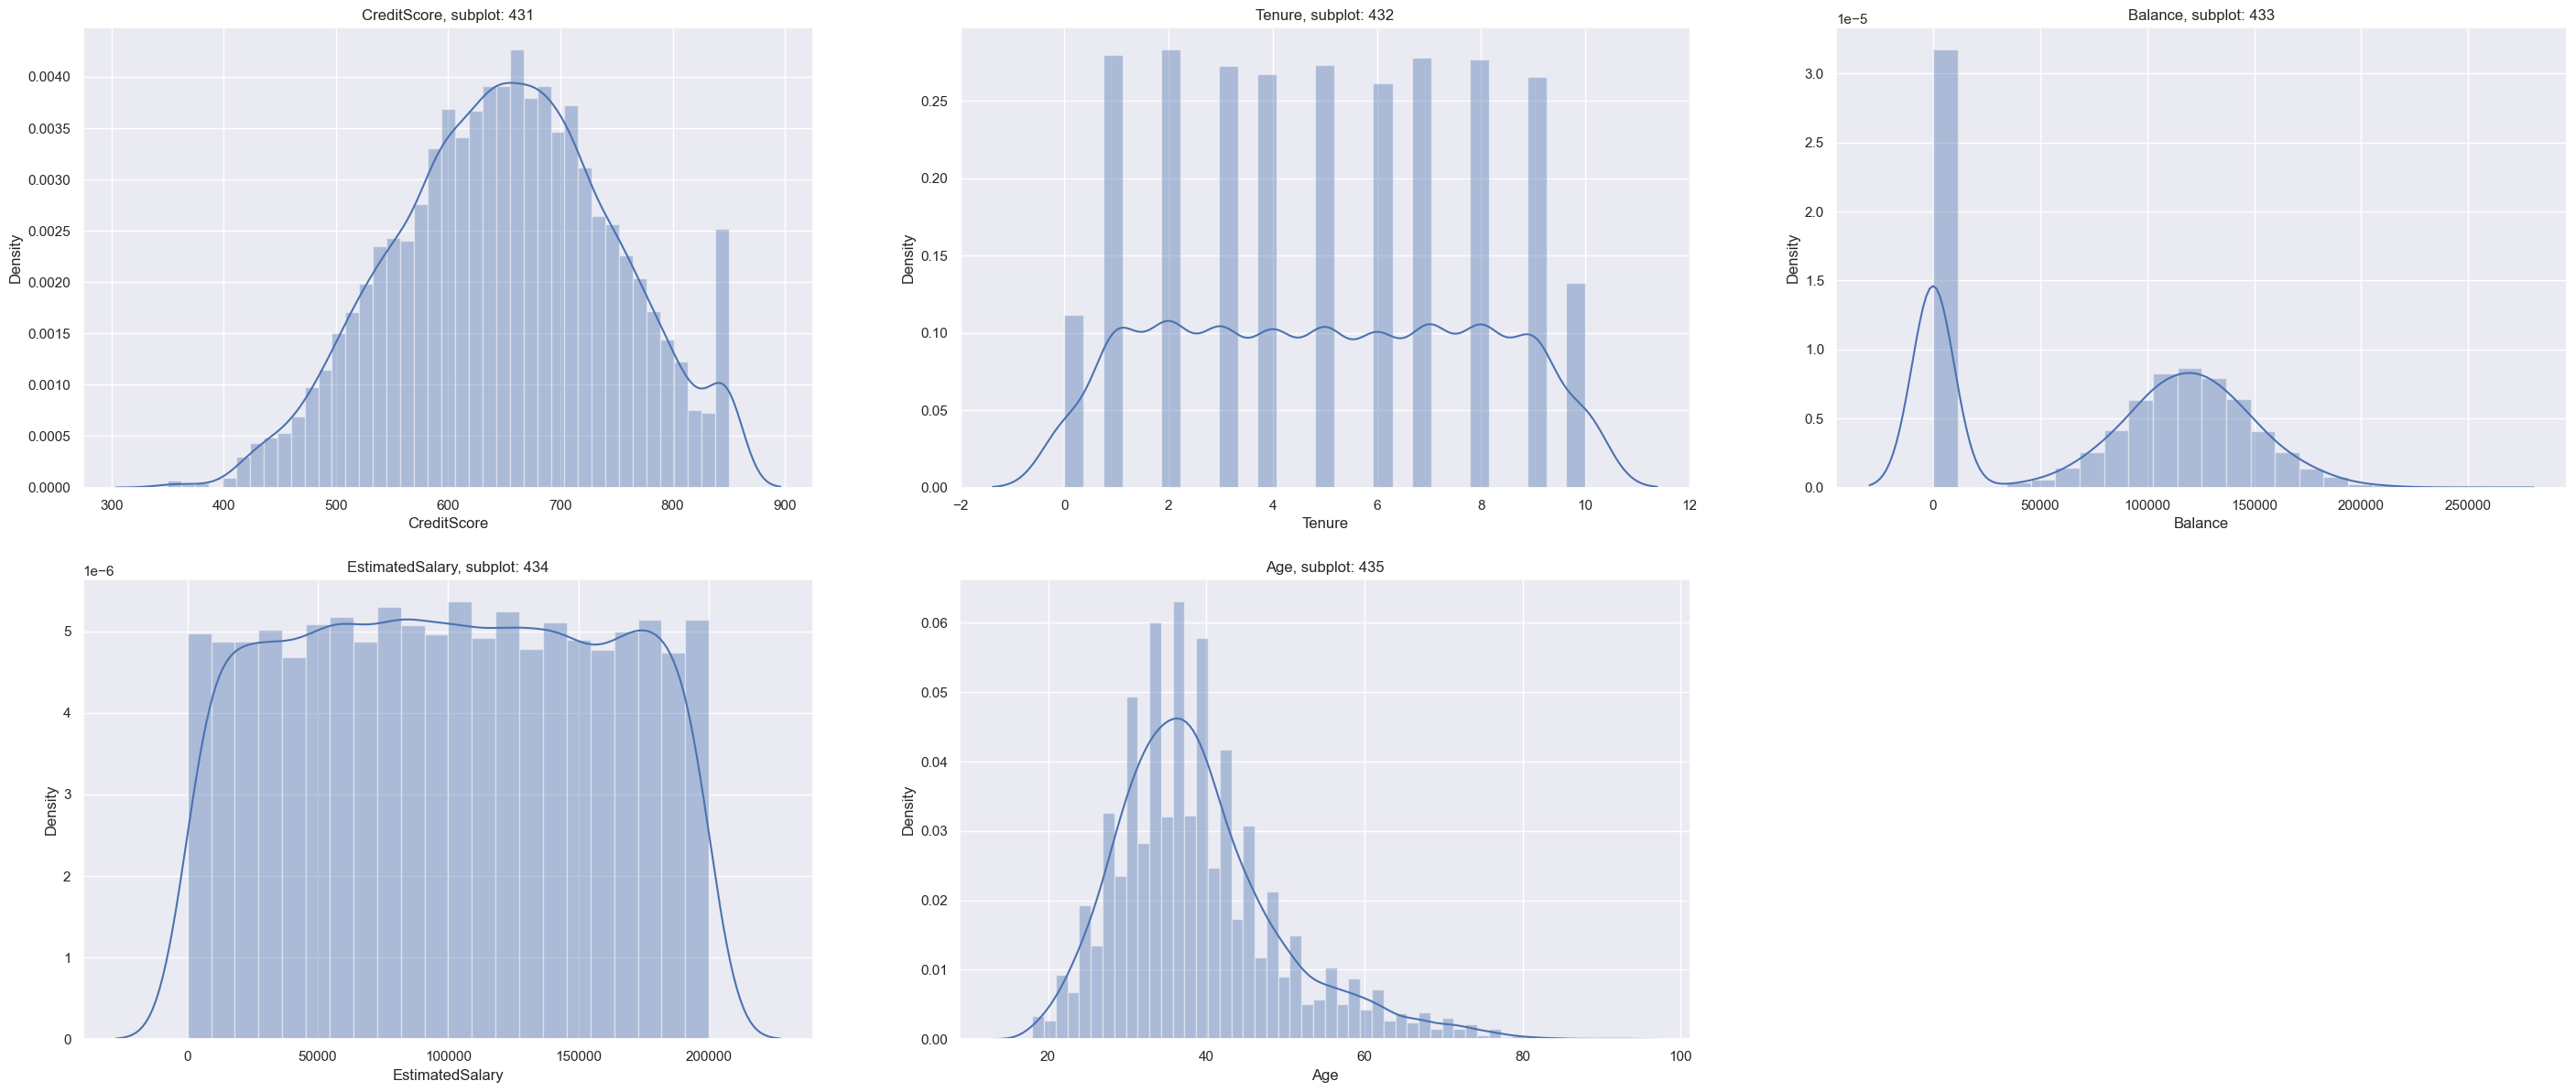

In [15]:
a=4
b=3
c=1
fig = plt.figure(figsize=(35,30))
for i in numerical:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.distplot(df[i])
    c = c + 1

Το παραπάνω διάγραμμα δείχνει την κατανομή των αριθμητικών μεταβλητών. Συνεπώς:
- Το πιστωτικό σκορ (CreditScore κατανέμεται στο εύρος τιμών, μεταξύ 300 και 900 λαμβάνοντας την μέγιστη μορφή του στα 650.
- Τα χρόνια που είναι πελάτης στην τράπεζα (Tenure) έχει σχετικά μια πολύ σταθερή κατανομή η οποία κυμαίνεται από 0 έως 10 κι η επίπεδη κορύφωσή της είναι από 1 έως 9.
- H πλειοψηφία των πελατών έχει μηδενικό υπόλοιπο (Balance), ενώ εκτός από αυτούς, οι υπόλοιποι έχουν υπόλοιπο μεταξύ 50000 και 200000.
- Ο εκτιμώμενος μισθός (EstimatedSalary)  έχει επίσης σταθερή κατανομή η οποία κυμαίνεται από 0 έως 200000.
- Η ηλικία (Age) των πελατών κυμαίνεται από 20 έως 85 ετών, με κορύφωση στα 35 έτη.

### Bivariate Visualization 

Οπτικοποίηση κάθε στήλης ως προς την ποιότητα

In [16]:
col = ['CreditScore','Tenure','Balance','NumOfProducts','EstimatedSalary','Gender',
        'Geography','HasCrCard','IsActiveMember','Age']

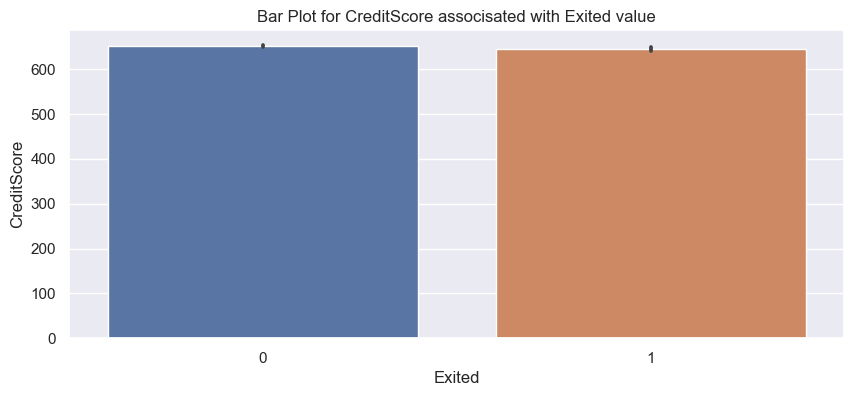

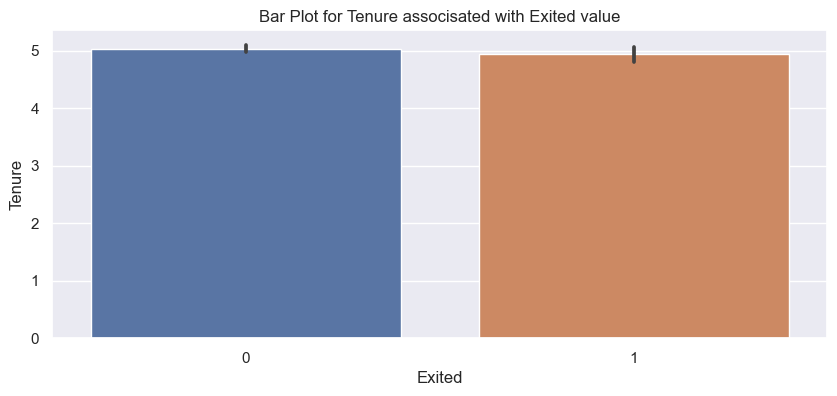

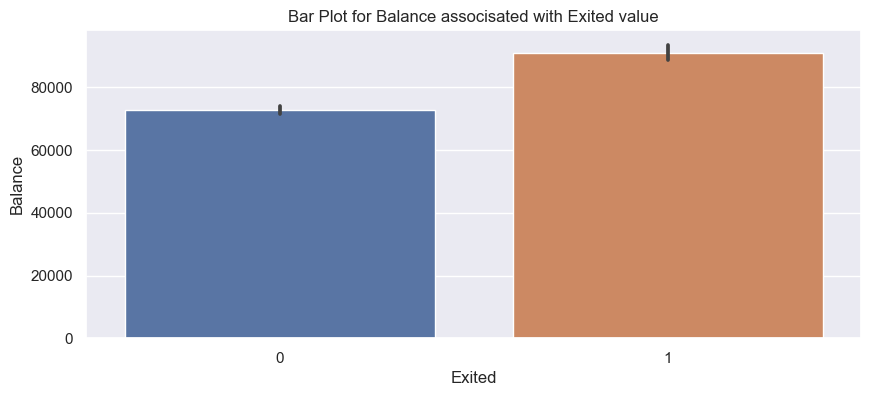

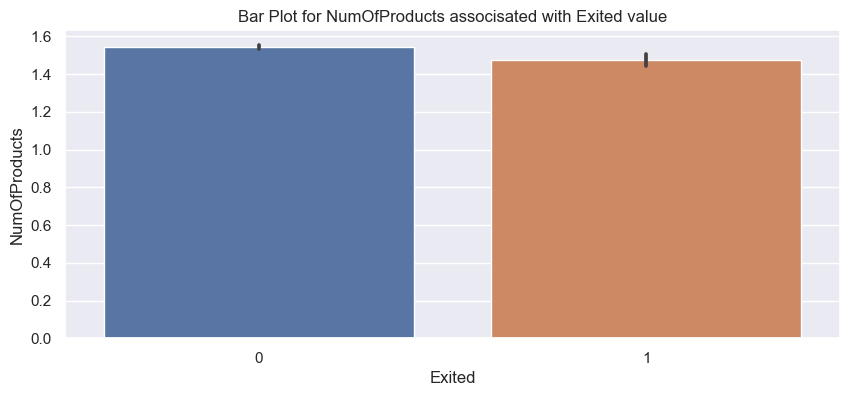

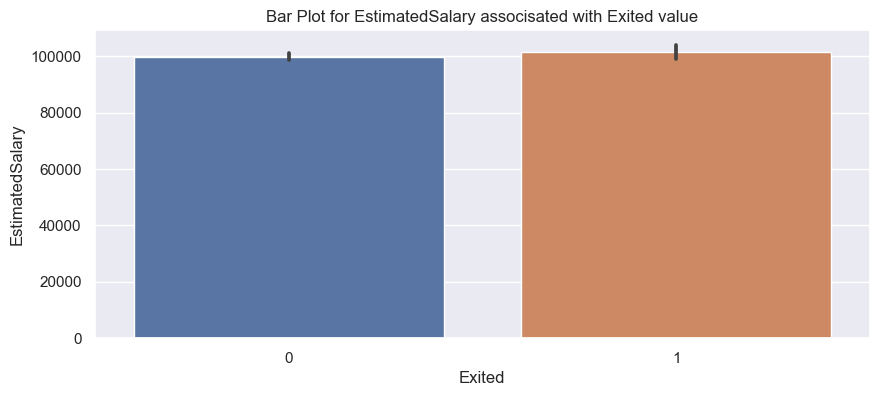

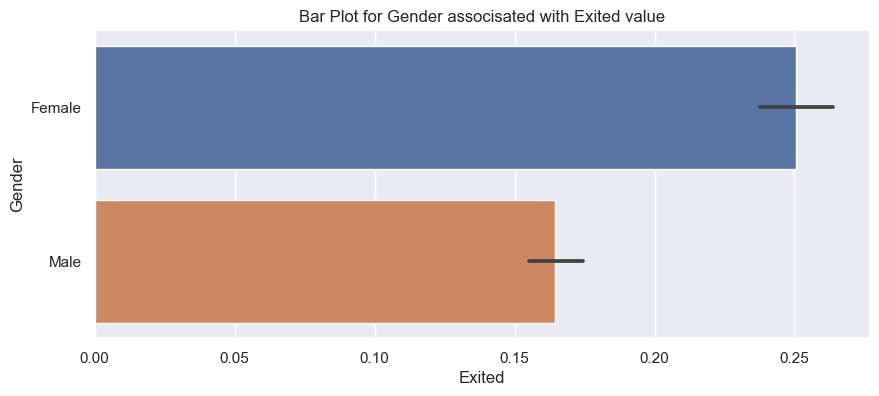

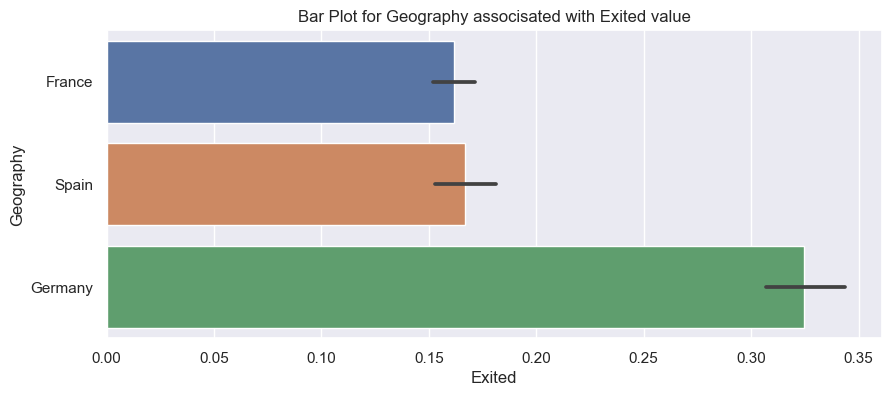

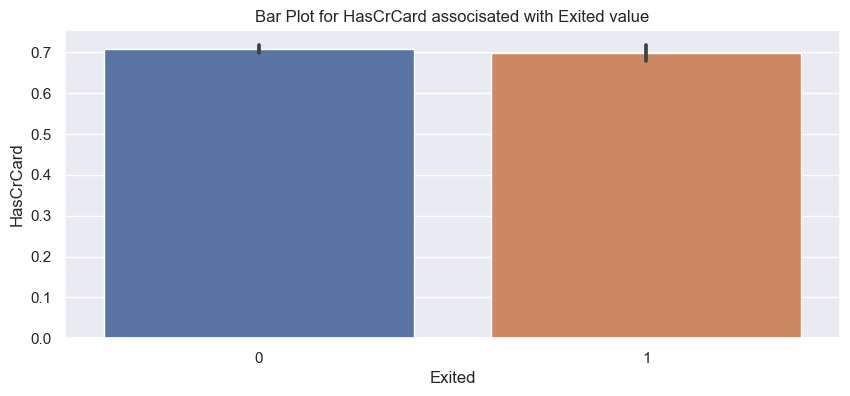

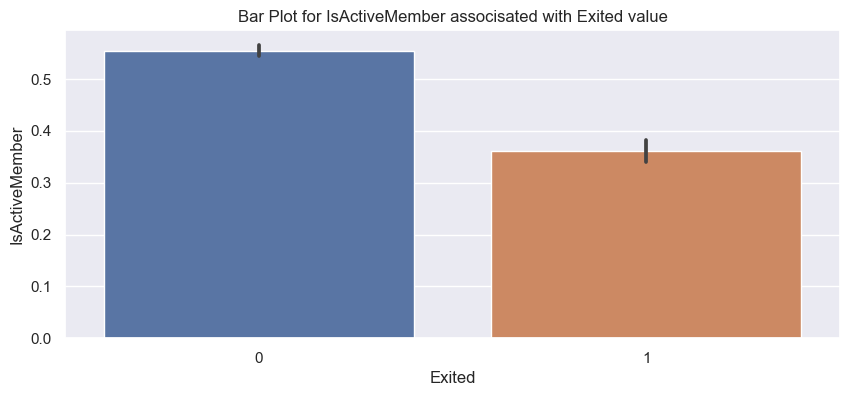

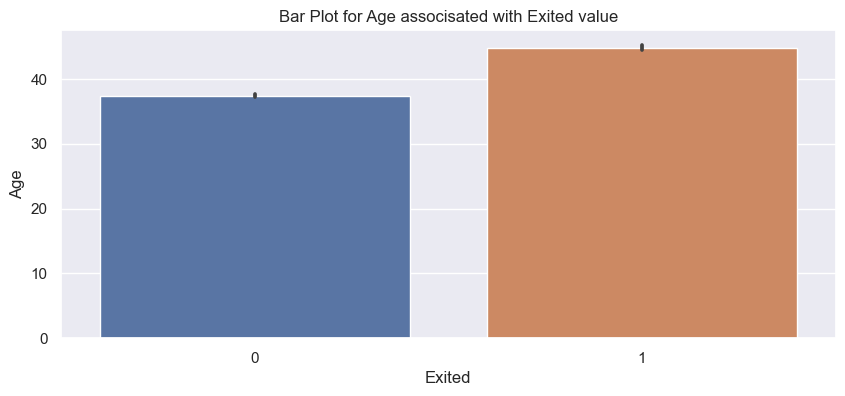

In [17]:
for i in col:
    fig, ax = plt.subplots(figsize=(10, 4))
    sns.barplot(data=df, y=i, x='Exited', ax=ax)
    ax.set_ylabel(i)
    ax.set_xlabel("Exited")
    ax.set_title(f'Bar Plot for {i} associsated with Exited value')
    plt.show()

Οι παραπάνω γραφικές παραστάσεις δείχνουν πώς ποικίλλουν οι τιμές κάθε μεταβλητής με τη μεταβλητή-στόχο (exited):
- Το πιστωτικό σκόρ (CreditScore) δεν επηρεάζει καθόλου την μεταβλητή αποχώρησης (Εxited) και είναι σχεδόν ίσο και για τις 2 κλάσεις (0,1) του 'Εxited'.
- Τα χρόνια που είναι πελάτης στην τράπεζα (Τenure) δεν επηρεάζουν καθόλου την μεταβλητή αποχώρησης (Exited) κι οι τιμές του είναι σχεδόν ίσες και για τις 2 κλάσεις (0,1) του 'Εxited'.
- Το υπόλοιπο του πελάτη (Balance) επηρεάζει την μεταβλητή 'Εxited'. Το υπόλοιπο των πελατών που αποχώρησαν (τιμή = 1) είναι υψηλότερο σε σύγκριση με τους άλλους πελάτες που δεν αποχώρησαν (τιμή = 0).
- Ο αριθμός των τραπεζικών προϊόντων (NumOfProducts)για τους πελάτες που δεν αποχωρούν είναι ελαφρώς υψηλότερος.
- O εκτιμώμενος μισθός (EstimatedSalary) δεν επηρεάζει καθόλου την μεταβλητή 'Εxited'. Οι τιμές του εκτίμησης μισθού είναι σχεδόν ίσες και για τις 2 κλάσεις (0,1) του 'Exited'.
- Οι γυναίκες είναι πιο πιθανό να αποχωρήσουν συγκριτικά με τους άντρες.
- Oι πελάτες από τη Γερμανία είναι πιθανότερο να αποχωρήσουν συγκριτικά με εκείνους από τη Γαλλία και την Ισπανία.
- Οι πελάτες που έχουν πιστωτικές κάρτες (HasCrCard) δεν επηρεάζουν καθόλου την μεταβλητή exited. Οι τιμές του 'HasCrCard' είναι σχεδόν ίσες και για τις 2 κλάσεις (0,1) του 'Exited'.
- Τα μη ενεργά μέλη (IsActiveMember) είναι πιο πιθανό να αποχωρήσουν.
- Πελάτες με ηλικία (Age) μεγαλύτερη των 40 ετών είναι πιο πιθανό να αποχωρήσουν.

### Feature Encoding
Κωδικοποίηση των κατηγορικών μεταβλητών:

In [18]:
df['Gender'] = df['Gender'].replace(['Male','Female'],[0,1])

In [19]:
df['Geography'] = df['Geography'].replace(['France','Germany','Spain'],[0,1,2])

**Correlation Plot**

Έλεγχος των τιμών συσχέτισης κάθε μεταβλητής

<Axes: >

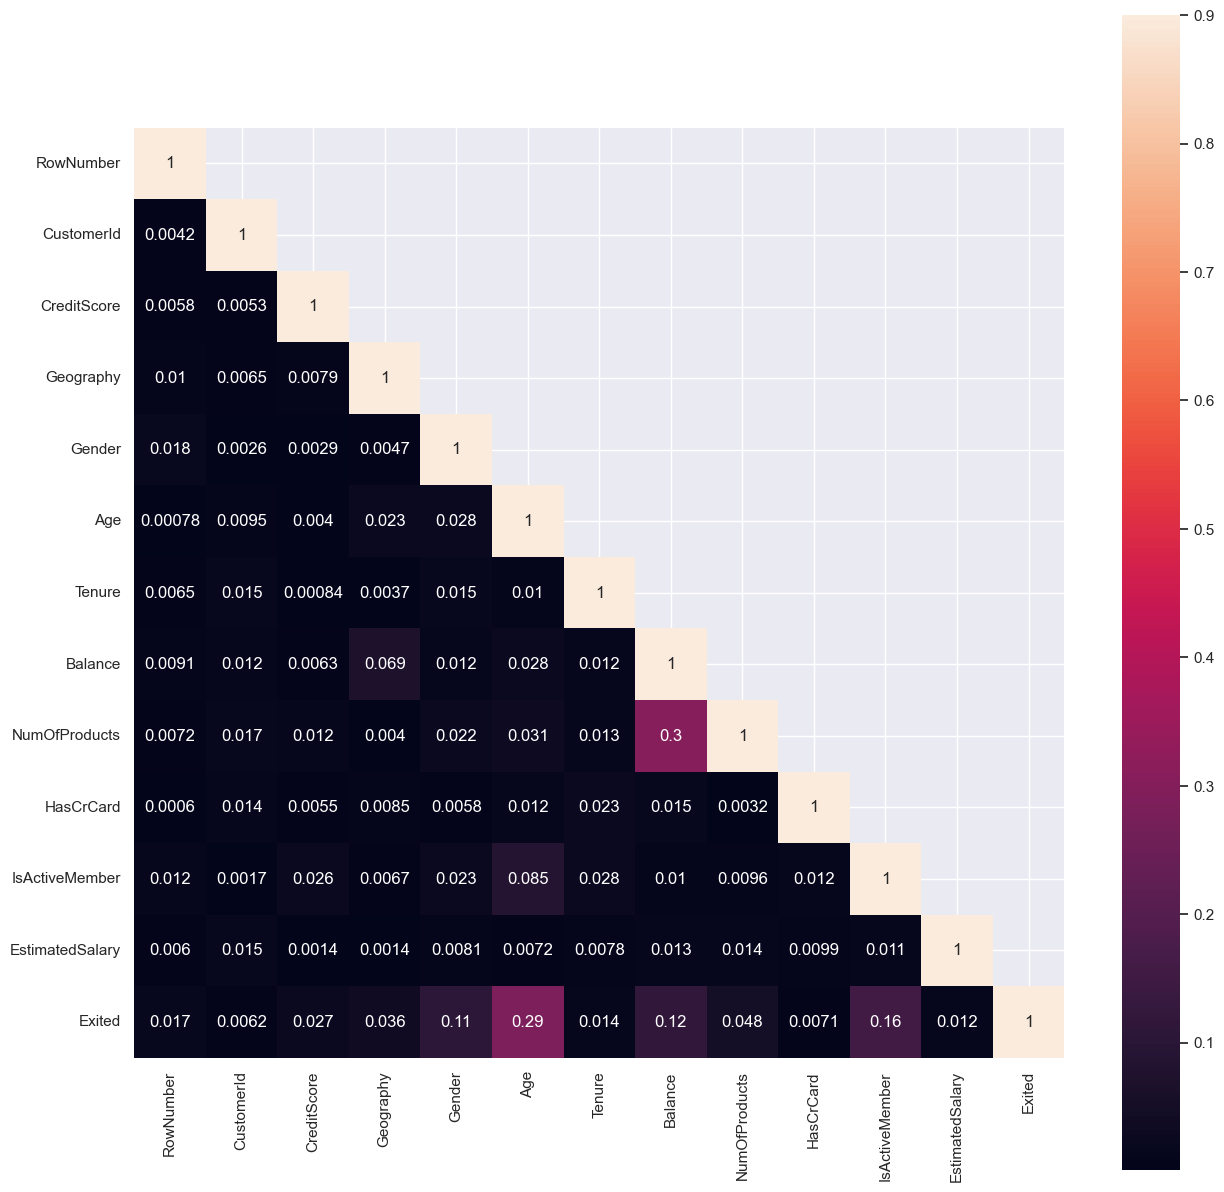

In [20]:
corr = df.corr(method = 'pearson').abs()

#convert correlation to numpy array
mask = np.array(corr)

#mask repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(15,15)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

Το παραπάνω διάγραμμα δείχνει τη συσχέτιση μεταξύ των μεταβλητών. Παρατηρούμε πως η πιθανότητα αποχώρησης των πελατών σχετίζεται με την ηλικία, το φύλο, εάν είναι ενεργό μέλος και τo υπόλοιπό του. 
Σε αντίθεση με τα παραπάνω χαρακτηριστικά, μικρότερη συσχέτιση έχουν η τοποθεσία και ο αριθμός των προϊόντων.

### Feature Selection

Παρόλο που η γραφική παράσταση συσχέτισης (correlation plot) προσδιορίζει ορισμένες μεταβλητές οι οποίες συσχετίζονται με την μεταβλητή εξόδου, για να αποφύγουμε το μοντέλο να κάνει overfit στα δεδομένα θα χρησιμοποιήσουμε όλες τις μεταβλητές, εκτός από τα ids columns

In [21]:
selected_df = df[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']]

### Class Imbalance Problem

Παρατηρούμε πως στη μεταβλητή στόχο (target variable), ο συνολικός αριθμός των 1 δεν είναι ίδιος με τον συνολικό αριθμό των 0. Συνεπώς, η απόδοση του ταξινομητή μπορεί να υποβαθμιστεί, καθώς θα κατακλυστεί από την κλάση θετικής τιμής και θα είναι λιγότερο αποδοτικός στην ταξινόμηση της αρνητικής κλάσης. Για το λόγο αυτό θα αναπαράγουμε τα δεδομένα αρνητικής κλάσης.

In [22]:
selected_df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [23]:
aa = selected_df[selected_df['Exited']==1].head(2037)
bb = selected_df[selected_df['Exited']==1].head(1852)

In [24]:
selected_df = selected_df.append(aa)
selected_df = selected_df.append(aa)
selected_df = selected_df.append(bb)

In [25]:
selected_df['Exited'].value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

Ισοδυναμία, θετικών κι αρνητικών τιμών

### Train Test Split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
y = selected_df['Exited'].values
y=y.reshape(-1,1)

In [28]:
x = selected_df[['CreditScore', 'Geography','Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]

In [29]:
xtrain , xtest , ytrain, ytest =train_test_split(x,y,test_size=0.1,random_state=42 )

In [30]:
print("xtrain shape : ", xtrain.shape) 
print("xtest shape  : ", xtest.shape) 
print("ytrain shape : ", ytrain.shape) 
print("ytest shape  : ", ytest.shape) 

xtrain shape :  (14333, 10)
xtest shape  :  (1593, 10)
ytrain shape :  (14333, 1)
ytest shape  :  (1593, 1)


## Classification Model Implementation and Evaluation

Εδώ θα εφαρμόσουμε διαφορετικούς αλγόριθμους ταξινόμησης, θα τους αξιολογήσουμε, θα απεικονίσουμε τα αποτελέσματά τους και θα τους συγκρίνουμε για να βρούμε το μοντέλο με την καλύτερη απόδοση. Οι αλγόριθμοι που θα εφαρμοστούν είναι οι εξής:
- k-Nearest Neighbors (KNN)
- Logistic Regression
- Decision Tree classifier
- Support Vector Machine Classifier
- Naive Bayes classifier
- Random Forest classifier
Kάθε μοντέλο θα αξιολογηθεί με τη χρήση των Classification Report, Confusion Matrix και ROC Curve.

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn import metrics

In [32]:
def classification_report_func(model):
    prediction_test = model.predict(xtest)
    accuracy = metrics.accuracy_score(ytest, prediction_test)
    confusion_matrix = metrics.confusion_matrix(ytest, prediction_test)
    classification = metrics.classification_report(ytest, prediction_test)

    print('=========================== Model Evaluation ===========================')
    print('Classifier :',model)
    print("\n Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 


In [33]:
class_names=[1,0]
def plot_conf_matrix(ytest, prediction_test, class_names):
    cnf_matrix = metrics.confusion_matrix(ytest, prediction_test)
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # Heatmap creation
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [34]:
def plot_roc(model,xtest,ytest):
    y_pred_proba = model.predict_proba(xtest)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(ytest, y_pred_proba)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr, label='KNN')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()

#### 1-  K- Nearest Neighbors (KNN)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=3).fit(xtrain, ytrain) 
prediction_test = clf_knn.predict(xtest)

In [36]:
classification_report_func(clf_knn)

=========================== Model Evaluation ===========================
Classifier : KNeighborsClassifier(n_neighbors=3)

 Model Accuracy:
 0.8022598870056498

Confusion matrix:
 [[520 303]
 [ 12 758]]

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.63      0.77       823
           1       0.71      0.98      0.83       770

    accuracy                           0.80      1593
   macro avg       0.85      0.81      0.80      1593
weighted avg       0.85      0.80      0.80      1593



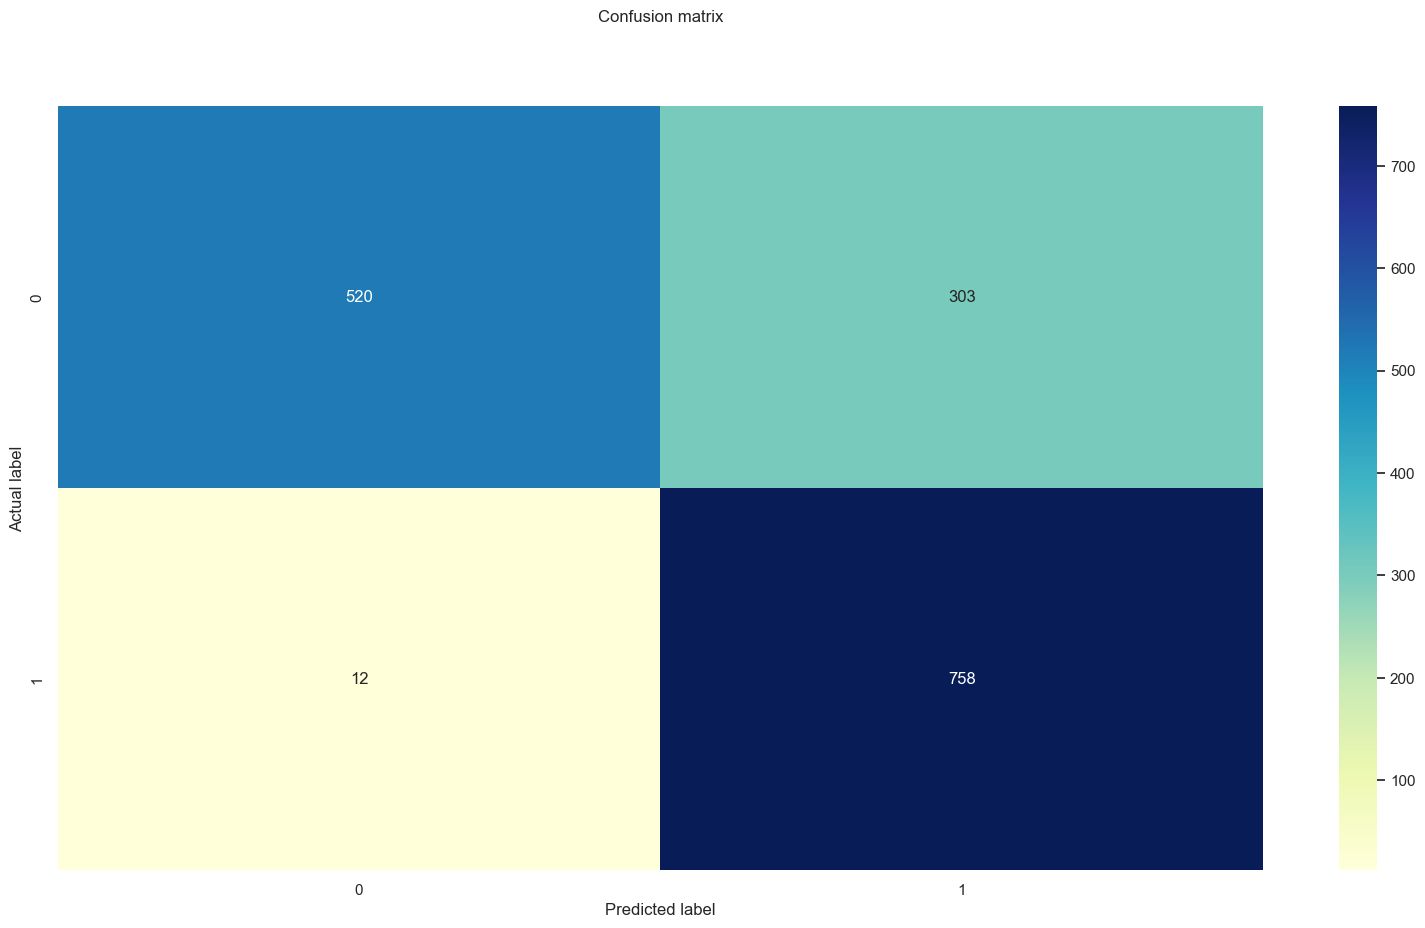

In [37]:
plot_conf_matrix(ytest, prediction_test, class_names)

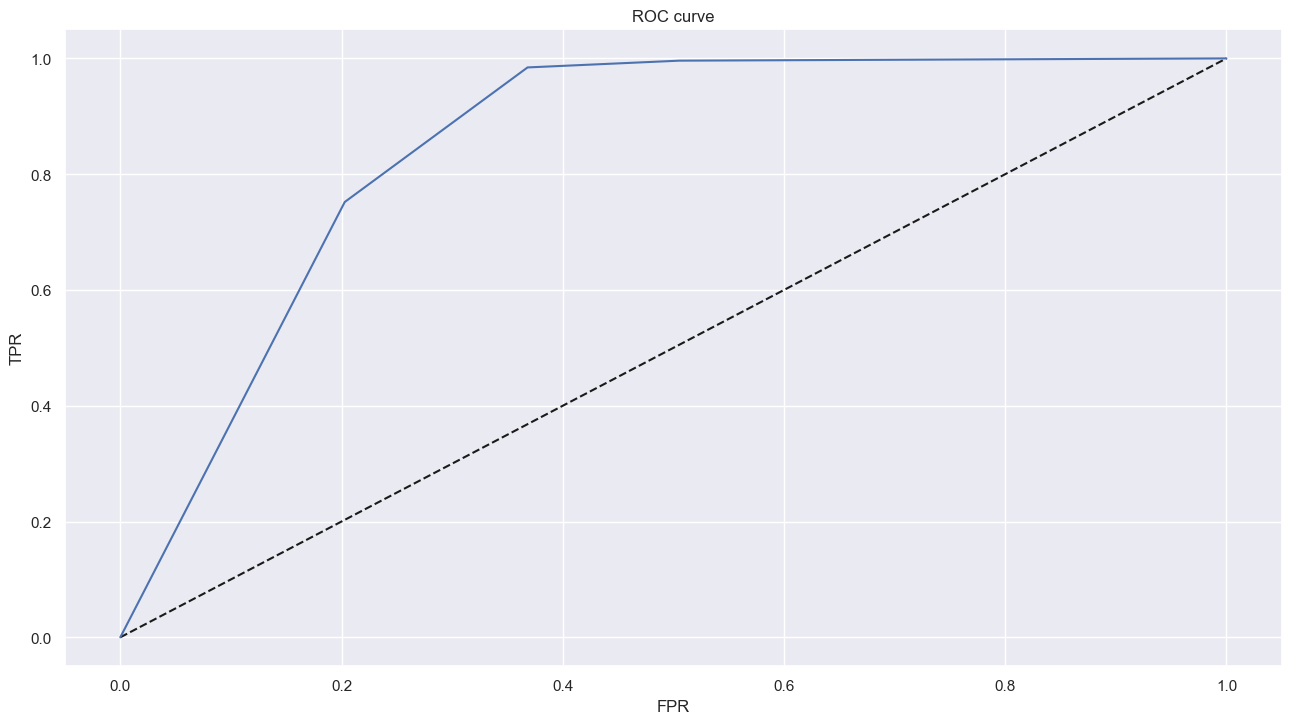

In [38]:
plot_roc(clf_knn,xtest,ytest)

In [3]:
#### 2-  Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
clf_lg = LogisticRegression().fit(xtrain, ytrain) 
pred_test_lg = clf_lg.predict(xtest)

In [41]:
classification_report_func(clf_lg)

=========================== Model Evaluation ===========================
Classifier : LogisticRegression()

 Model Accuracy:
 0.6490897677338355

Confusion matrix:
 [[525 298]
 [261 509]]

Classification report:
               precision    recall  f1-score   support

           0       0.67      0.64      0.65       823
           1       0.63      0.66      0.65       770

    accuracy                           0.65      1593
   macro avg       0.65      0.65      0.65      1593
weighted avg       0.65      0.65      0.65      1593



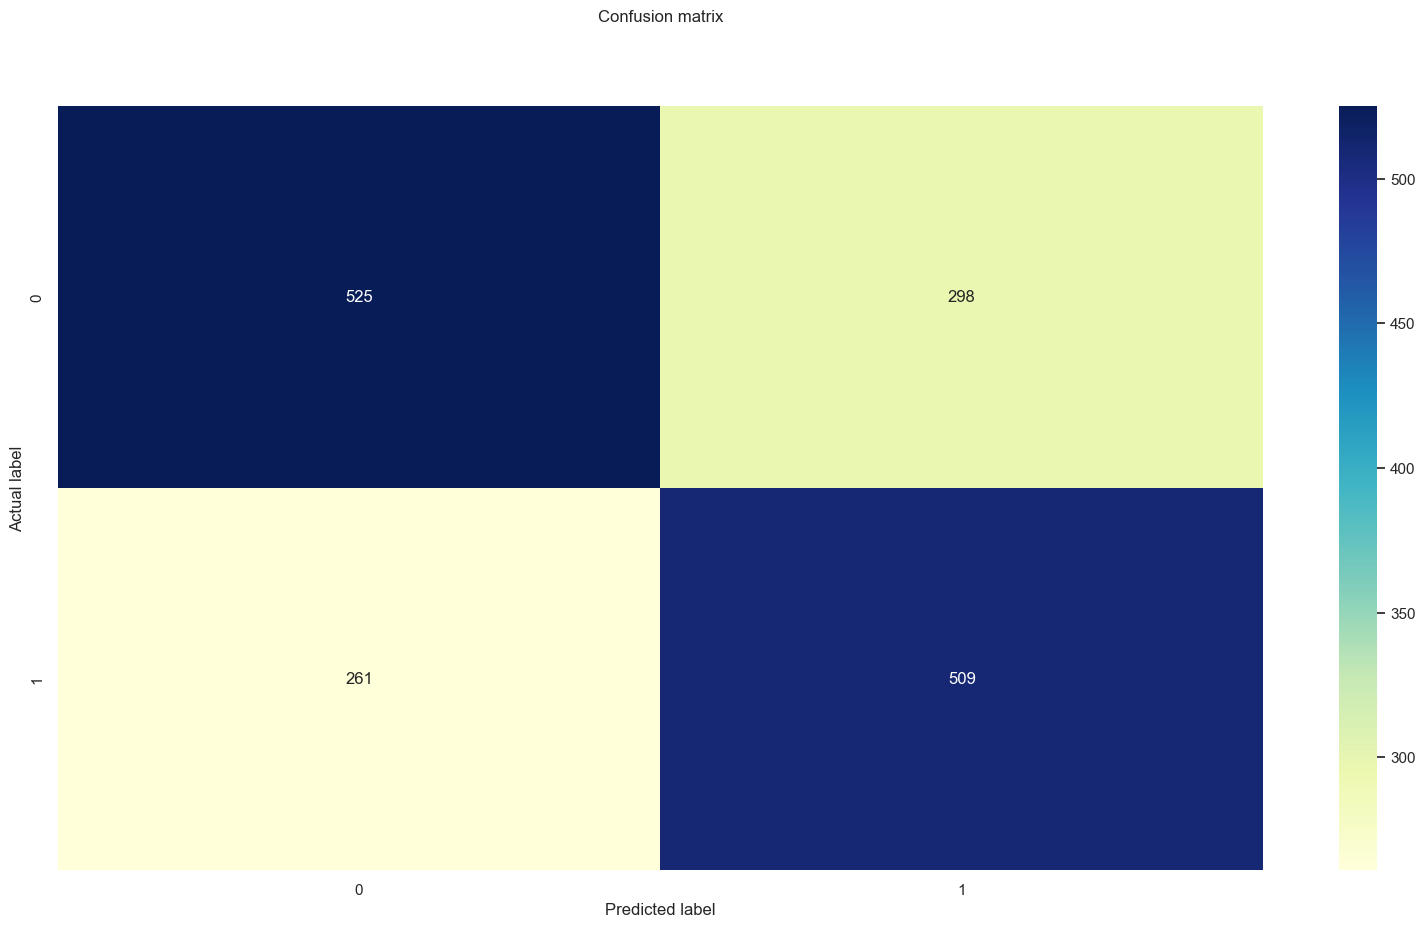

In [42]:
plot_conf_matrix(ytest, pred_test_lg, class_names)

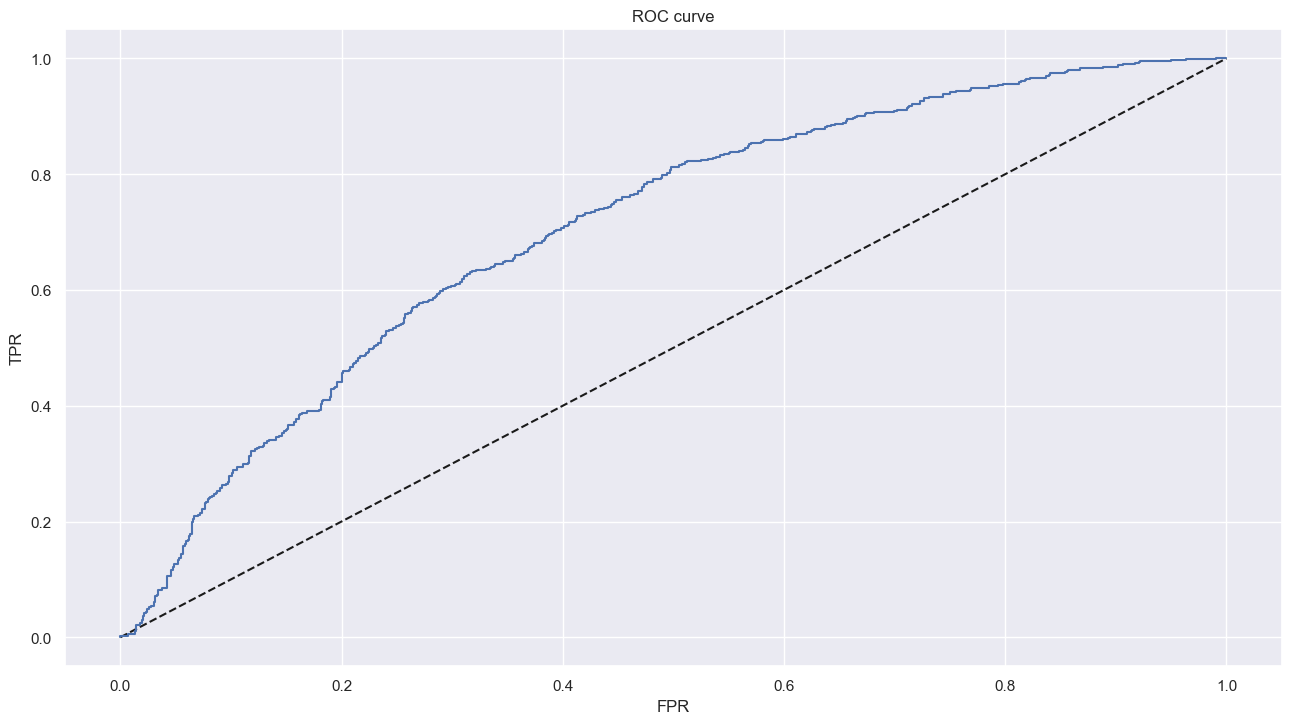

In [43]:
plot_roc(clf_lg,xtest,ytest)

#### 3- DecisionTree Classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [45]:
clf_dt=DecisionTreeClassifier(criterion="entropy", max_depth=7)
clf_dt.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

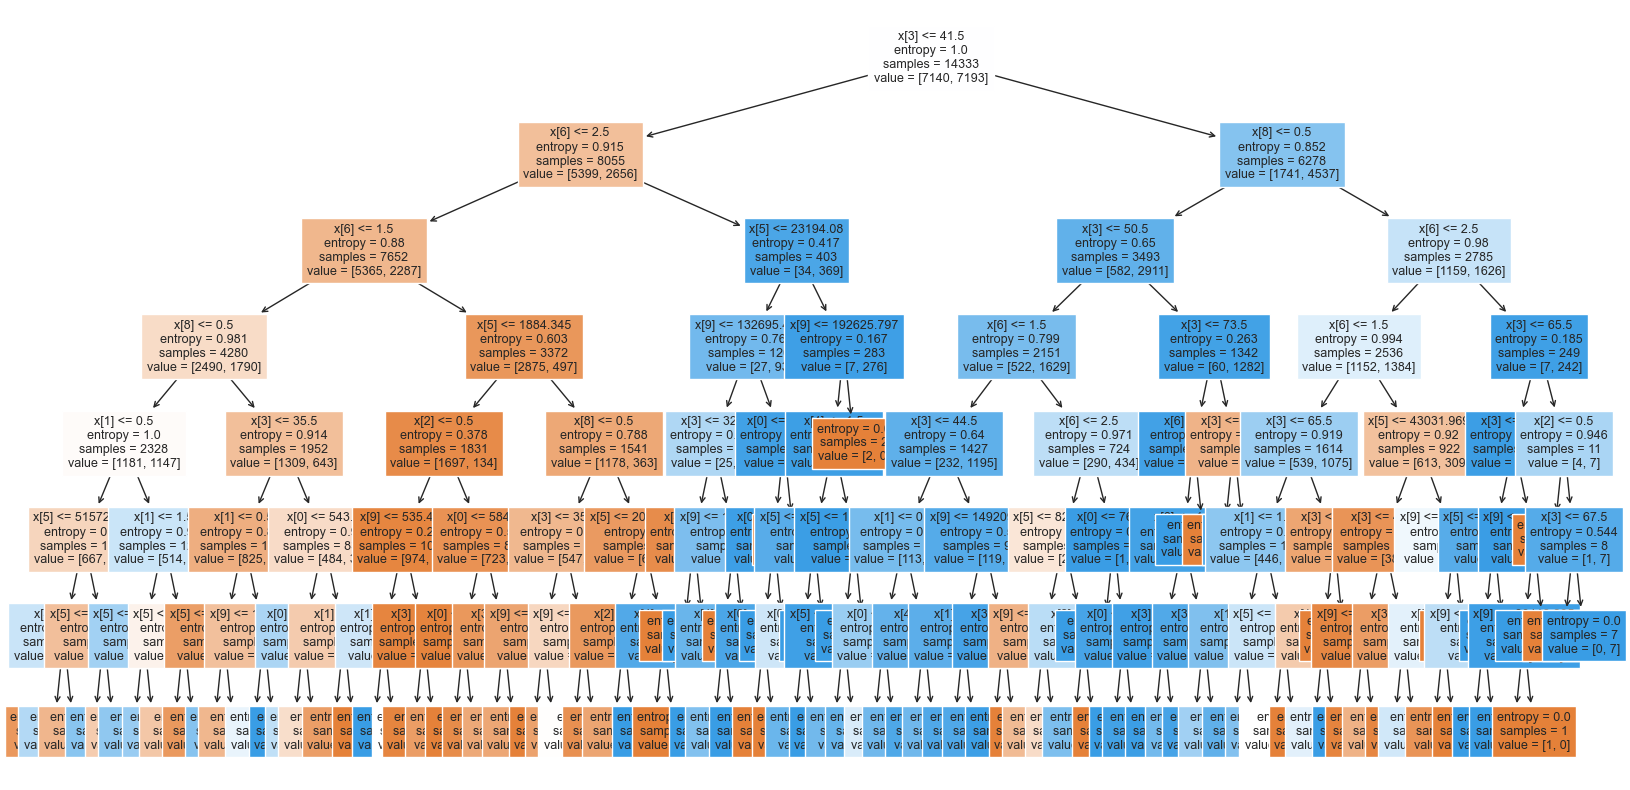

In [46]:
plt.figure(figsize=(20,10))
plot_tree(clf_dt,fontsize=9,filled=True)
plt.show()

In [47]:
pred_test_dt=clf_dt.predict(xtest)

In [48]:
classification_report_func(clf_dt)

=========================== Model Evaluation ===========================
Classifier : DecisionTreeClassifier(criterion='entropy', max_depth=7)

 Model Accuracy:
 0.7827997489014438

Confusion matrix:
 [[648 175]
 [171 599]]

Classification report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79       823
           1       0.77      0.78      0.78       770

    accuracy                           0.78      1593
   macro avg       0.78      0.78      0.78      1593
weighted avg       0.78      0.78      0.78      1593



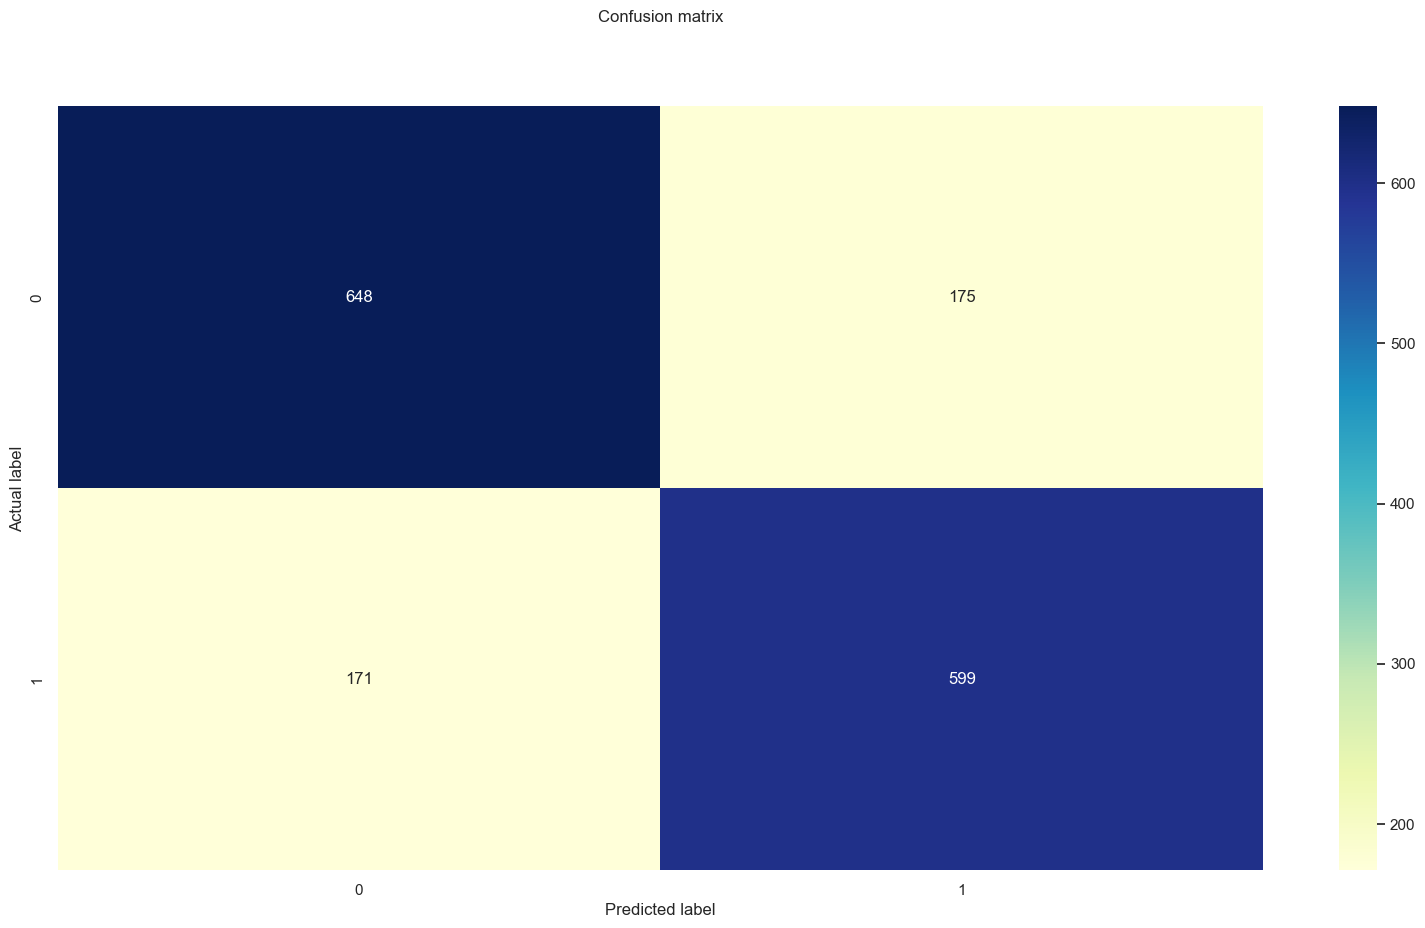

In [49]:
plot_conf_matrix(ytest, pred_test_dt, class_names)

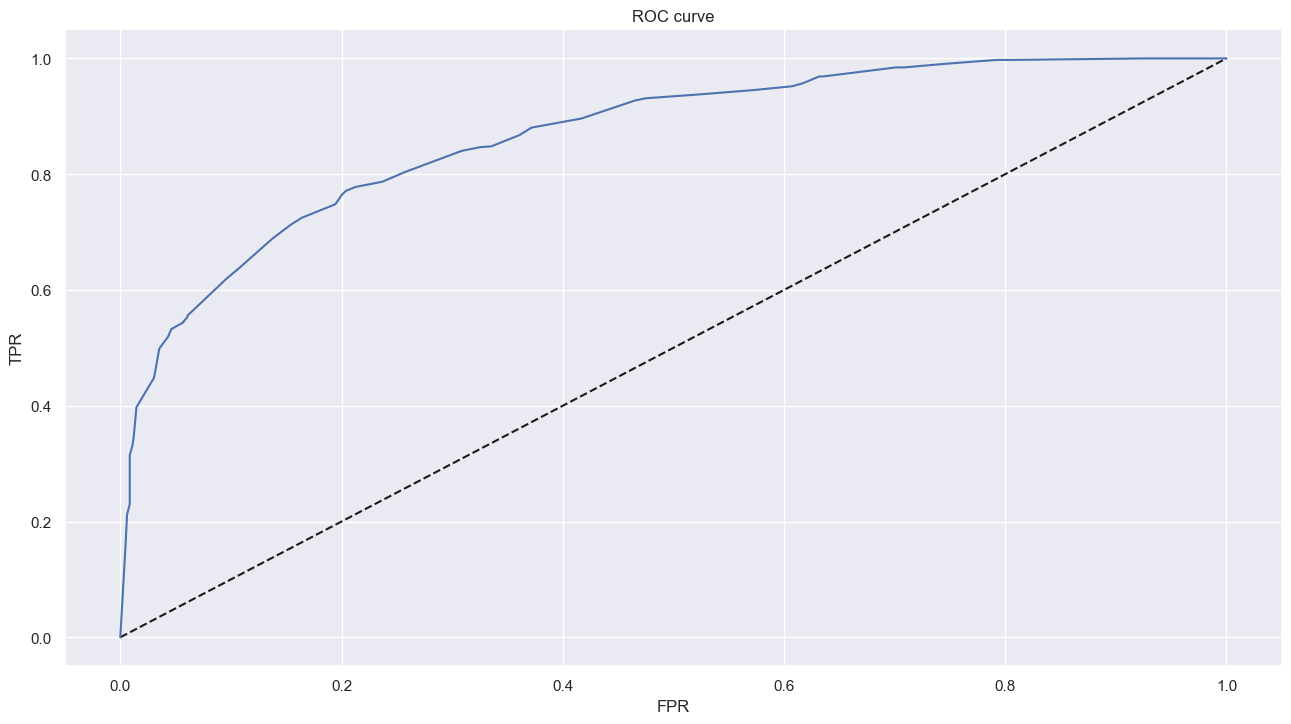

In [50]:
plot_roc(clf_dt,xtest,ytest)

#### 4- Support Vector Machine

In [51]:
from sklearn import svm

#svm Classifier creation
clf_svm = svm.SVC(kernel='rbf',probability=True) # Linear Kernel

#Train the model
clf_svm.fit(xtrain, ytrain)

#Test dataset reponse prediction
y_pred_svm = clf_svm.predict(xtest)

In [52]:
classification_report_func(clf_svm)

=========================== Model Evaluation ===========================
Classifier : SVC(probability=True)

 Model Accuracy:
 0.5612052730696798

Confusion matrix:
 [[318 505]
 [194 576]]

Classification report:
               precision    recall  f1-score   support

           0       0.62      0.39      0.48       823
           1       0.53      0.75      0.62       770

    accuracy                           0.56      1593
   macro avg       0.58      0.57      0.55      1593
weighted avg       0.58      0.56      0.55      1593



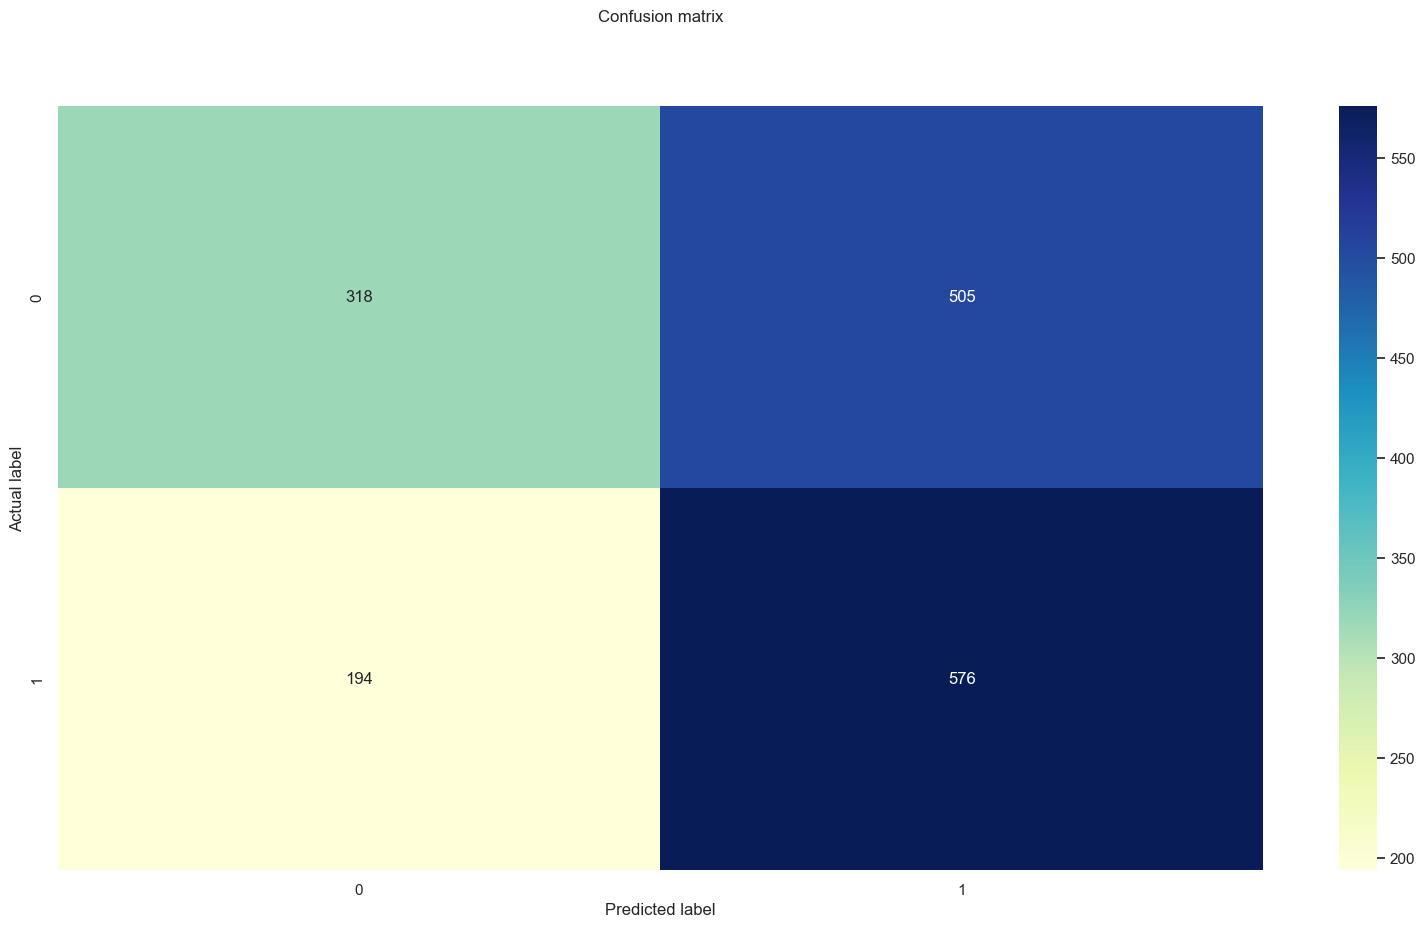

In [53]:
plot_conf_matrix(ytest, y_pred_svm, class_names)

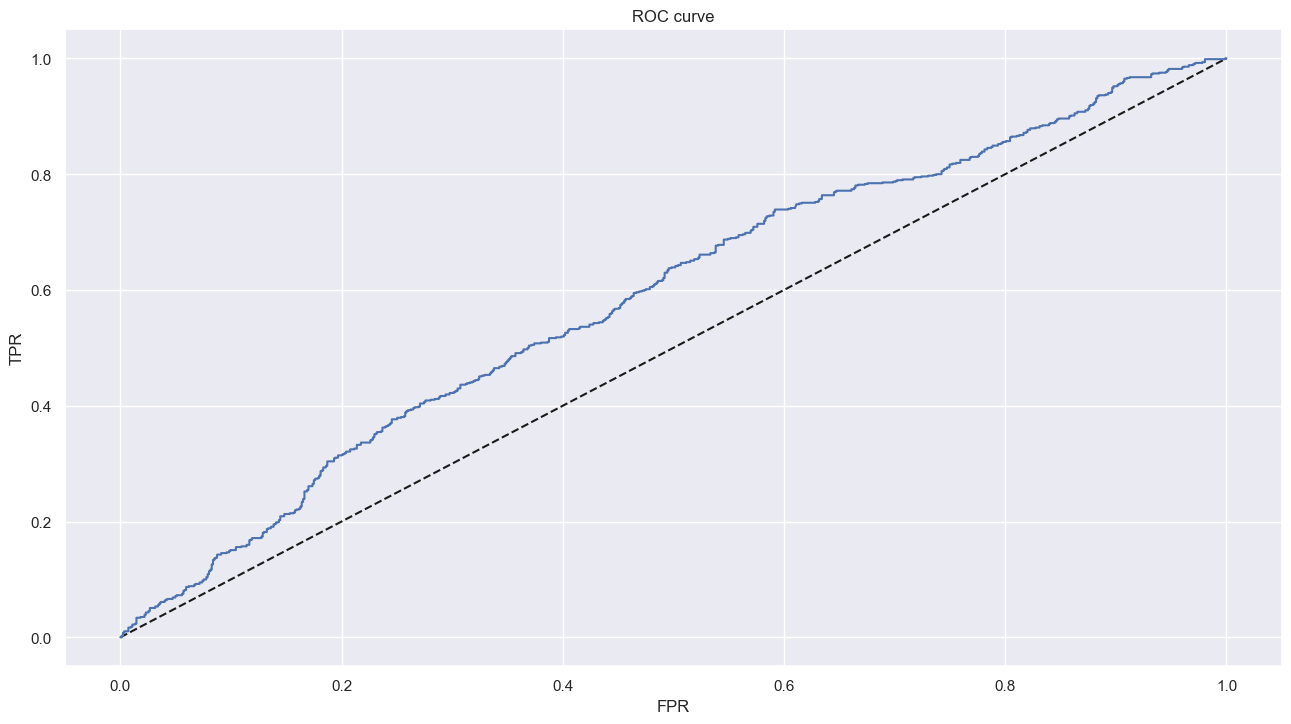

In [54]:
plot_roc(clf_svm,xtest,ytest)

#### 5- Naive Bayes

In [55]:
from sklearn.naive_bayes import GaussianNB

In [56]:
clf_nb= GaussianNB().fit(xtrain, ytrain) 
pred_test_nb = clf_nb.predict(xtest)

In [57]:
classification_report_func(clf_nb)

=========================== Model Evaluation ===========================
Classifier : GaussianNB()

 Model Accuracy:
 0.6911487758945386

Confusion matrix:
 [[581 242]
 [250 520]]

Classification report:
               precision    recall  f1-score   support

           0       0.70      0.71      0.70       823
           1       0.68      0.68      0.68       770

    accuracy                           0.69      1593
   macro avg       0.69      0.69      0.69      1593
weighted avg       0.69      0.69      0.69      1593



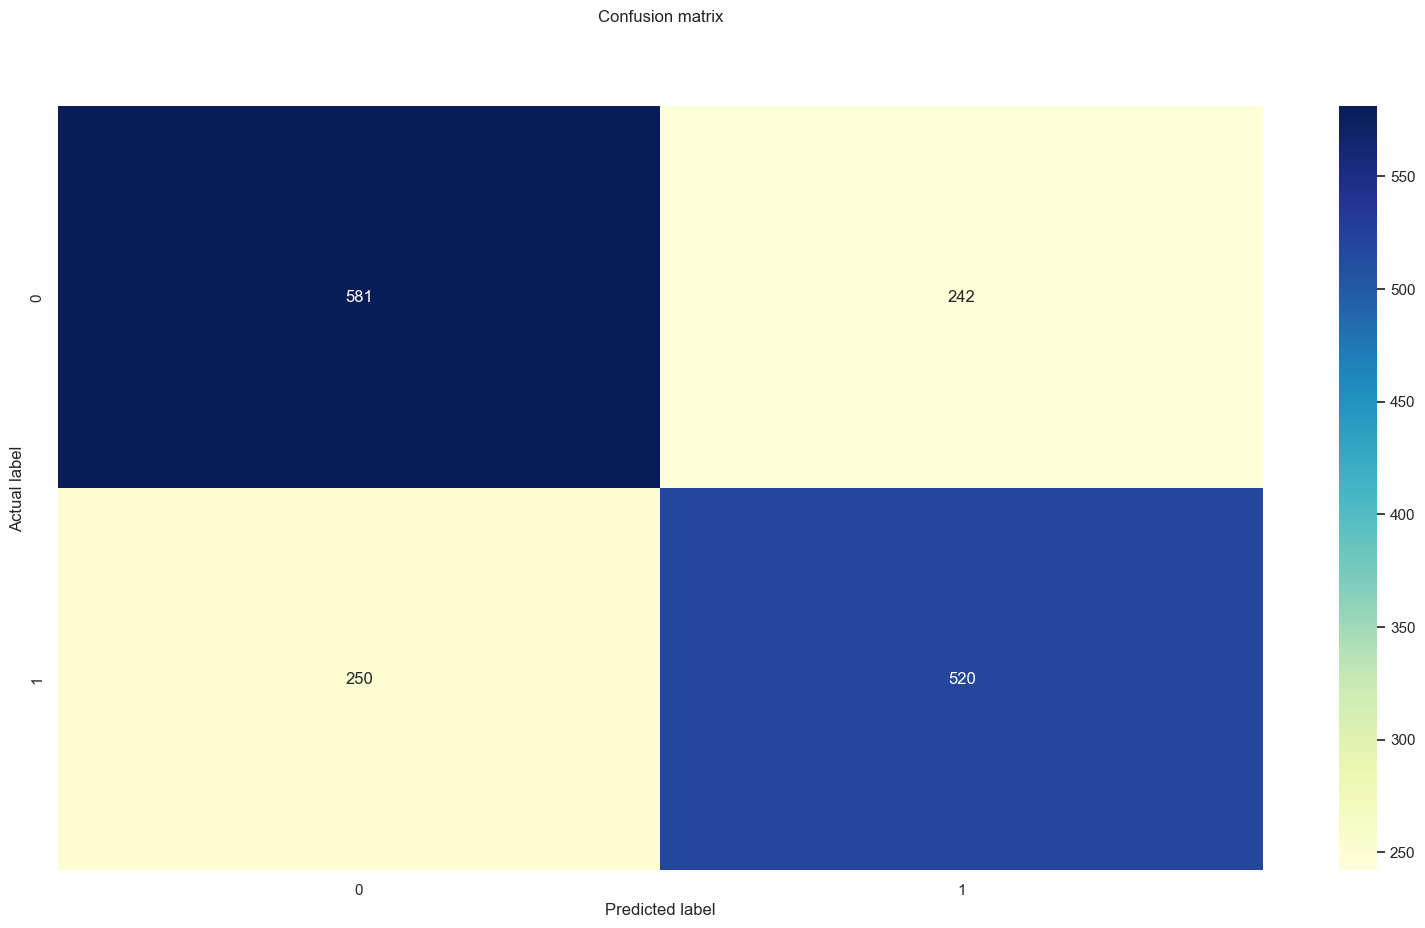

In [58]:
plot_conf_matrix(ytest, pred_test_nb, class_names)

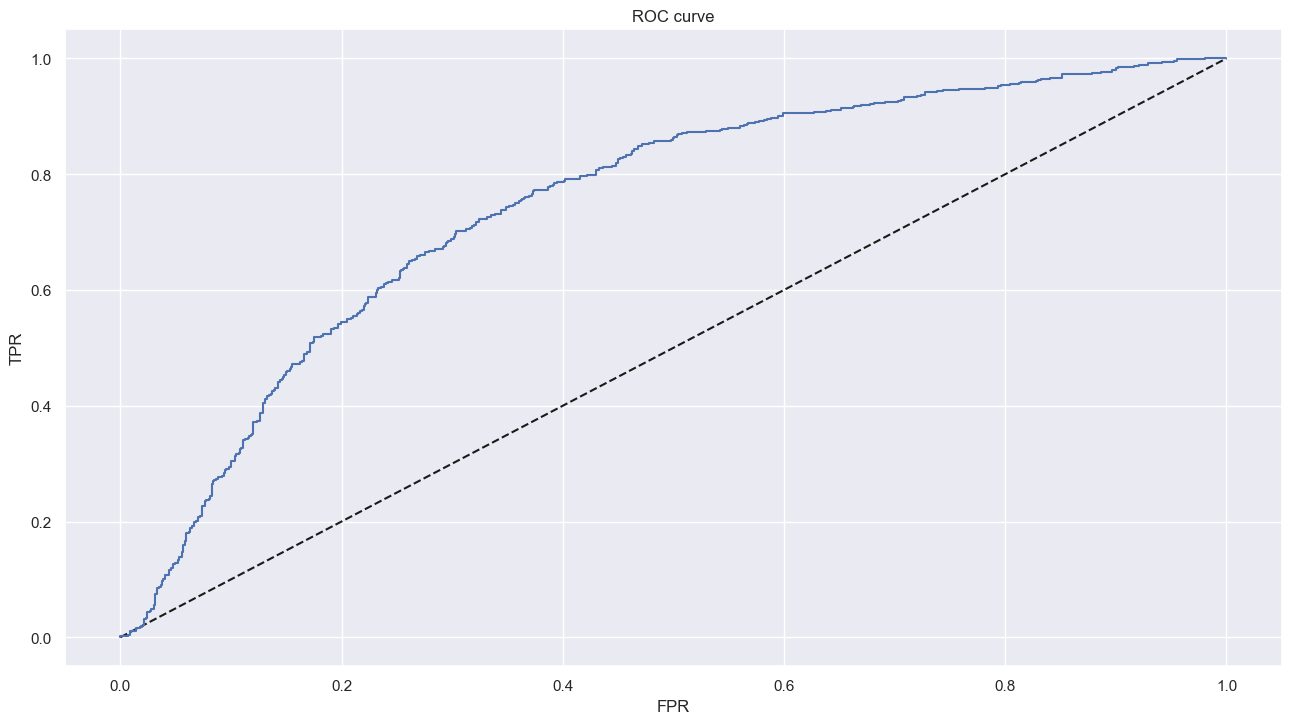

In [59]:
plot_roc(clf_nb,xtest,ytest)

#### 6- Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

#Gaussian Classifier creation
clf_rf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_rf.fit(xtrain,ytrain)

pred_test_rf=clf_rf.predict(xtest)

In [61]:
classification_report_func(clf_rf)

=========================== Model Evaluation ===========================
Classifier : RandomForestClassifier()

 Model Accuracy:
 0.9617074701820465

Confusion matrix:
 [[762  61]
 [  0 770]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96       823
           1       0.93      1.00      0.96       770

    accuracy                           0.96      1593
   macro avg       0.96      0.96      0.96      1593
weighted avg       0.96      0.96      0.96      1593



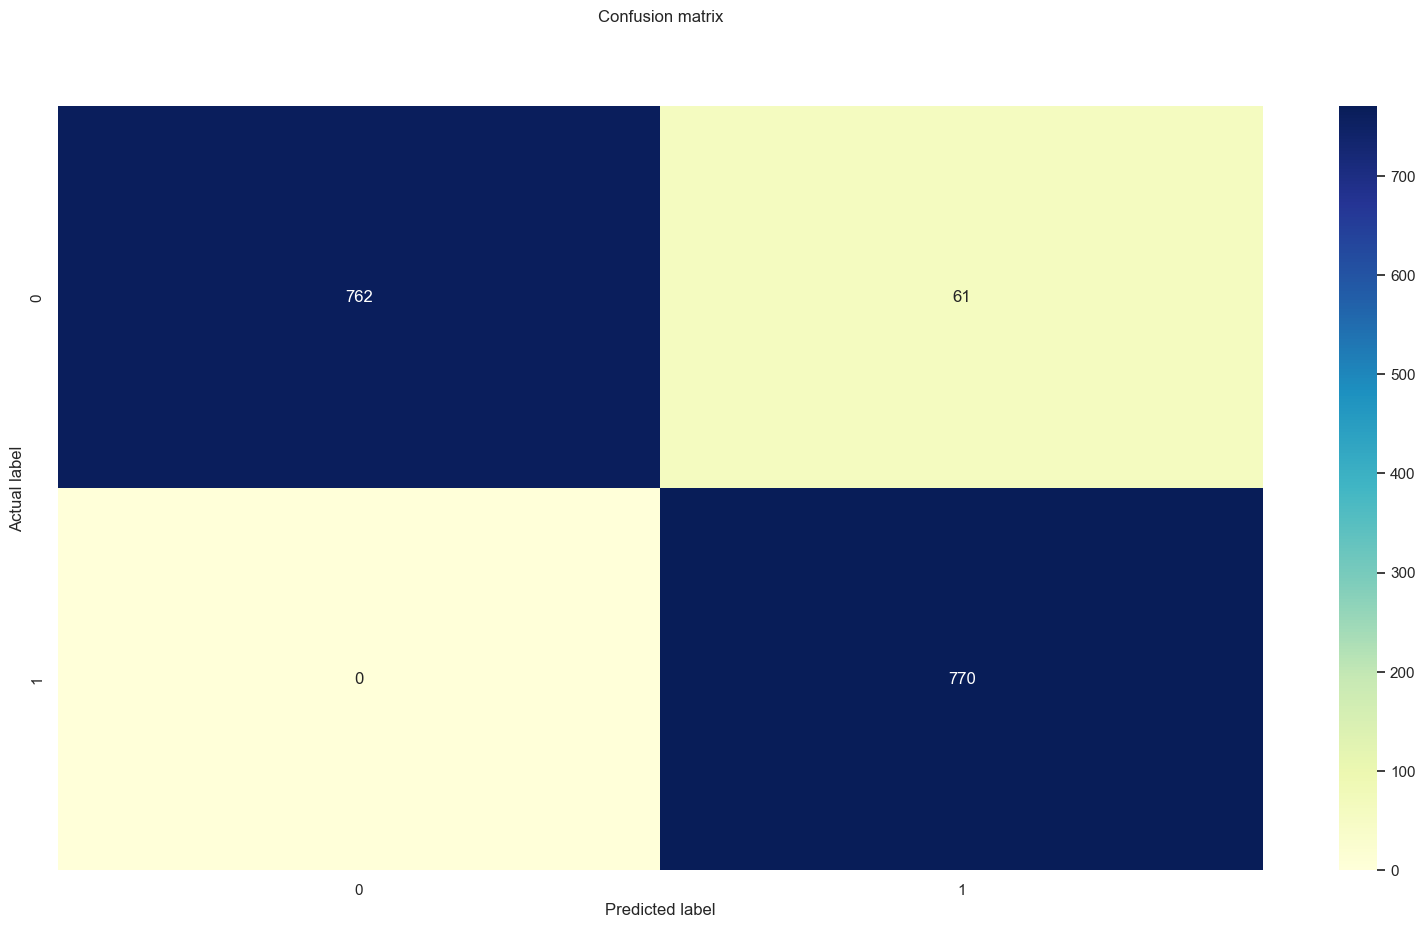

In [62]:
plot_conf_matrix(ytest, pred_test_rf, class_names)

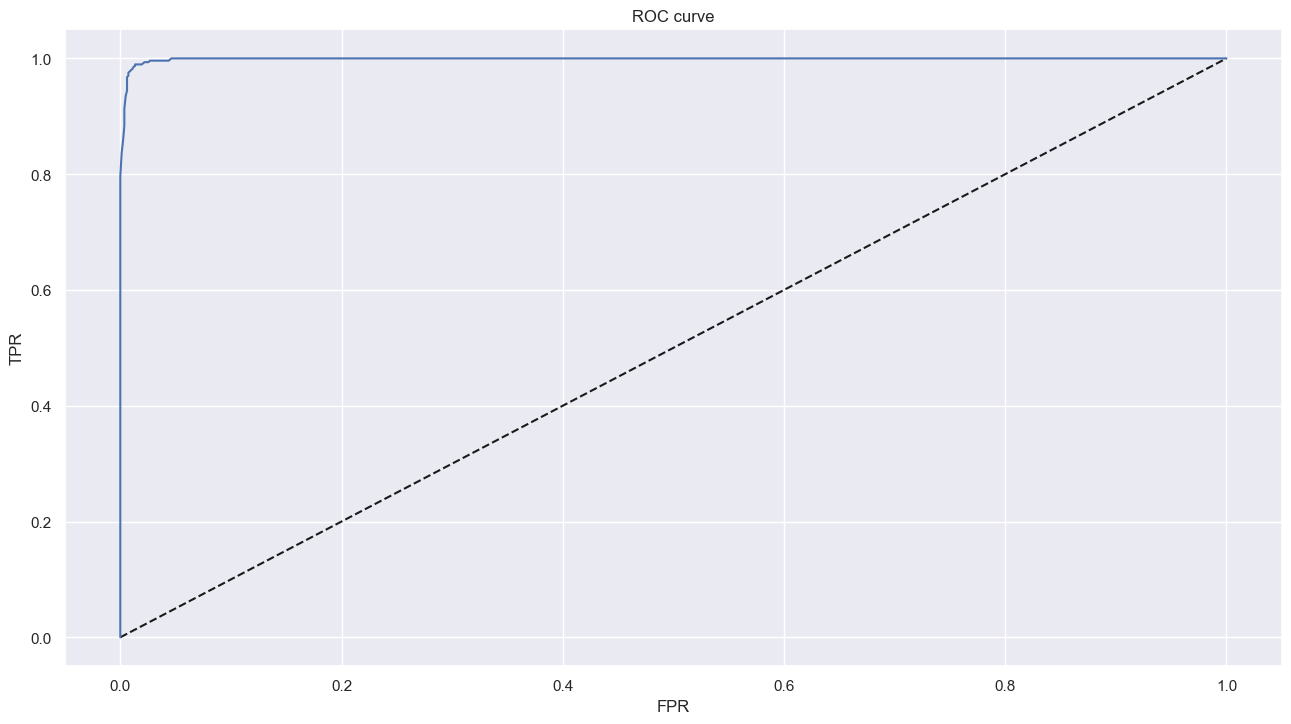

In [63]:
plot_roc(clf_rf,xtest,ytest)

**Analysis**

Ακολουθώντας την ίδια λογική εφαρμόσαμε τα 6 διαφορετικά μοντέλα εποπτευόμενης μηχανικής μάθησης με ταξινόμηση στα δεδομένα “Bank Customer Churn” για να δούμε ποιο μοντέλο αποδίδει καλύτερα στην πρόβλεψη της συμπεριφοράς των πελατών, εάν θα αποχωρήσει ή όχι. Για την αξιολόγηση της απόδοσης κάθε μοντέλου χρησιμοποιήθηκαν διαφορετικοί πίνακες αξιολόγησης (evaluation matrix), που είναι classification report, confusion matrix, και ROC curve. Στο dataset χρησιμοποιήθηκε το ‘test_size = 0.1’ που σημαίνει πως το 10% των δεδομένων χρησιμοποήθηκαν για testing, ενώ το υπόλοιπο 90% χρησιμοποιήθηκε για training. Από τις μετρήσεις αυτές παρατηρούμε ότι ο ταξινομητής Random Forest αποδίδει καλύτερα σε σχέση με τα υπόλοιπα 6 μοντέλα μηχανικής μάθησης με ακρίβεια 96%.

### Feature Importance 

In [64]:
feature_imp = clf_rf.feature_importances_
features = list(xtrain)
feature_list = sorted(zip(features, feature_imp),reverse=True)
feat_imp_df = pd.DataFrame(feature_list,columns=['features','feature_importance']).sort_values(by='feature_importance',ascending=False)

In [65]:
feat_imp_df.style.background_gradient(cmap='Greens')

,features,feature_importance
9,Age,0.255504
8,Balance,0.144150
6,EstimatedSalary,0.140499
7,CreditScore,0.133630
1,NumOfProducts,0.133163
0,Tenure,0.079367
4,Geography,0.037588
2,IsActiveMember,0.037308
5,Gender,0.020493
3,HasCrCard,0.018299


[Text(0.5, 1.0, 'Top 5 Random Forest Important Features')]

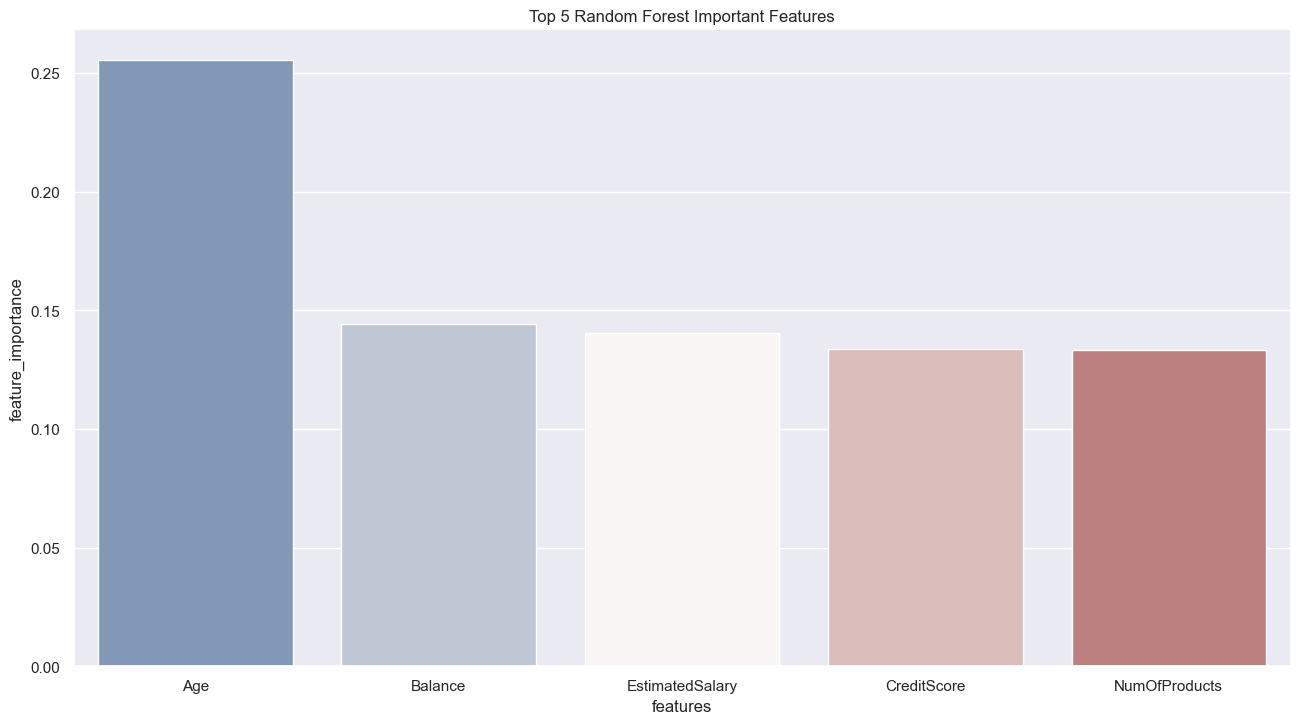

In [66]:
sns.barplot(x='features',y='feature_importance',data = feat_imp_df[:5], palette = 'vlag').set(title='Top 5 Random Forest Important Features')

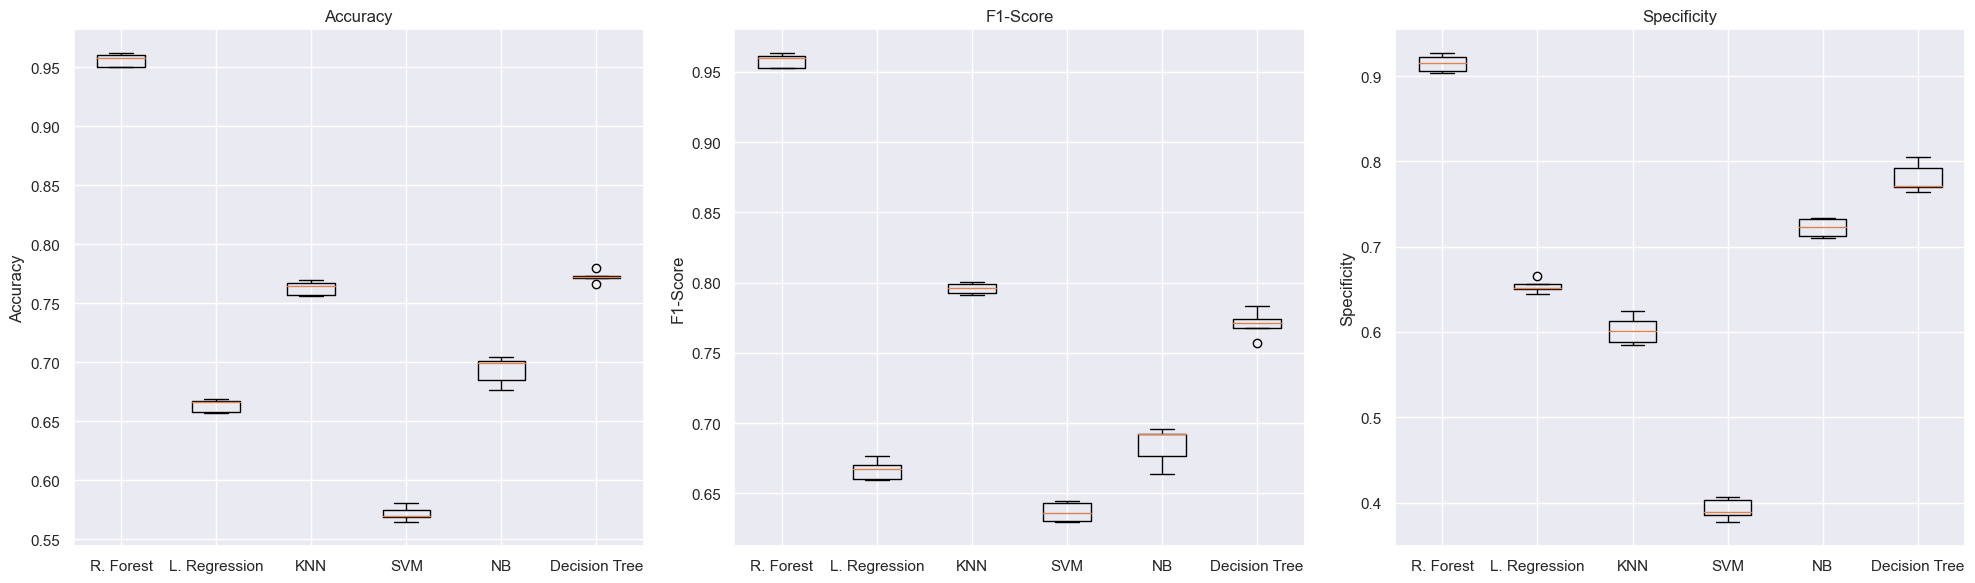

In [67]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold

# Listing classifiers and assign their names
classifiers = [
    (RandomForestClassifier(n_estimators=100), 'R. Forest'),
    (LogisticRegression(), 'L. Regression'),
    (KNeighborsClassifier(n_neighbors=3), 'KNN'),
    (svm.SVC(kernel='rbf', probability=True), 'SVM'),
    (GaussianNB(), 'NB'),
    (DecisionTreeClassifier(criterion='gini', max_depth=7), 'Decision Tree'),
]

# Creating lists to store the accuracy, F1-score, and specificity values for each classifier
accuracy_values = []
f1_values = []
specificity_values = []

# Iteration through classifiers
for clf, clf_name in classifiers:
    # Initialize StratifiedKFold for cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Lists to store accuracy, F1-score, and specificity values for each fold
    accuracy_fold_values = []
    f1_fold_values = []
    specificity_fold_values = []

    # Iteration through the folds
    for train_idx, test_idx in cv.split(selected_df.drop('Exited', axis=1), selected_df['Exited']):
        X_train, X_test = selected_df.drop('Exited', axis=1).iloc[train_idx], selected_df.drop('Exited', axis=1).iloc[test_idx]
        y_train, y_test = selected_df['Exited'].iloc[train_idx], selected_df['Exited'].iloc[test_idx]

        # Fit the model
        clf.fit(X_train, y_train)

        # Get predicted labels
        y_pred = clf.predict(X_test)

        # Calculation of the confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

        # Calculation of the accuracy, F1-score, and specificity
        accuracy_fold = accuracy_score(y_test, y_pred)
        f1_fold = f1_score(y_test, y_pred)
        specificity_fold = tn / (tn + fp)

        # Append values to fold lists
        accuracy_fold_values.append(accuracy_fold)
        f1_fold_values.append(f1_fold)
        specificity_fold_values.append(specificity_fold)

    # Append mean values for each metric
    accuracy_values.append(accuracy_fold_values)
    f1_values.append(f1_fold_values)
    specificity_values.append(specificity_fold_values)

# Convert lists to NumPy arrays
accuracy_values = np.array(accuracy_values)
f1_values = np.array(f1_values)
specificity_values = np.array(specificity_values)

# Box plots creation for the accuracy, F1-score, and specificity
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
plt.boxplot(accuracy_values.T, labels=[clf_name for _, clf_name in classifiers])
plt.title('Accuracy')
plt.ylabel('Accuracy')

plt.subplot(1, 3, 2)
plt.boxplot(f1_values.T, labels=[clf_name for _, clf_name in classifiers])
plt.title('F1-Score')
plt.ylabel('F1-Score')

plt.subplot(1, 3, 3)
plt.boxplot(specificity_values.T, labels=[clf_name for _, clf_name in classifiers])
plt.title('Specificity')
plt.ylabel('Specificity')

plt.tight_layout()
plt.show()
